## **Problem Statement**
# A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
## Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

## Introduction:<a class="anchor" id="1"></a>
### What is a Decision Tree?
+ #### Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
+ #### In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
+ #### The decisions or the test are performed on the basis of features of the given dataset.
+ #### It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.
+ #### It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
+ #### In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.
+ #### A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.

In [1]:
!pip install dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 51.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.5 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filena

In [2]:
!pip install imblearn

In [3]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from dataprep.eda import plot, plot_correlation, plot_missing, create_report
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedGroupKFold, cross_val_score,train_test_split, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Decision%20Tree/Company_Data.csv")
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

##  About Dataset<a class="anchor" id="2"></a>
Context\
About the data:

Let’s consider a Company dataset with around 10 variables and 400 records.
The attributes are as follows:
+ Sales -- Unit sales (in thousands) at each location
+ Competitor Price -- Price charged by competitor at each location
+ Income -- Community income level (in thousands of dollars)
+ Advertising -- Local advertising budget for company at each location (in thousands of dollars)
+ Population -- Population size in region (in thousands)
+ Price -- Price company charges for car seats at each site
+ Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
+ Age -- Average age of the local population
+ Education -- Education level at each location
+ Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
+ US -- A factor with levels No and Yes to indicate whether the store is in the US or not

##  Data Exploration <a class="anchor" id="3"></a>

Before doing anything else with the data let's see if there are any null values (missing data) in any of the columns.

In [5]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [6]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
data = pd.DataFrame(df)
data

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

- We have no missing data so all the entries are valid for use.

- Now we can check the column names to get a better understanding of what features we will be basing our classification on.

###  Descriptive Analysis<a class="anchor" id="3.1"></a>

In [8]:
df.shape

(400, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [10]:
df[df.duplicated()].shape

(0, 11)

In [11]:
df[df.duplicated()]

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []

In [12]:
df.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

The features are not on the same scale. For example `Population` has a mean of `	264.84` and `Advertising` has a mean value of `6.63`. Features should be on the same scale for algorithms such as logistic regression (gradient descent) to converge smoothly. Let's go ahead and check further.

###  Feature Engineering<a class="anchor" id="3.2"></a>

In [13]:
df.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

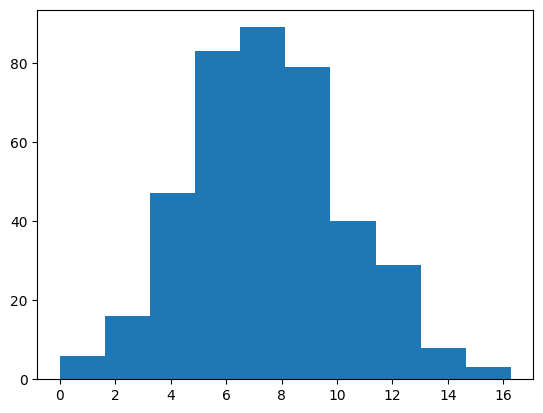

In [14]:
plt.hist("Sales", data=df)
plt.show()

####  As the Sales distribution is not skewed and it is normal distribution we can take mean or median as a threshold to make two or three categories 'Low', 'Medium' and 'High' Sales
### For two categories lets assume: Sales < 7.5 as “Bad=0” and Sales > 7.5 as “Good=1”
### and For three categories lets divide the Sales values with Quartiles , less than first quartile as 'Low' , between Second Quartile as 'Medium and above Third Quartile as 'High'

In [15]:
df.Sales.max()

16.27

In [16]:
16.27/3

5.423333333333333

In [17]:
5.4233333*2

10.8466666

In [18]:
5.4233333*3

16.269999900000002

In [19]:
# Converting taxable_income <=30000 as "Risky" and others are "Good"
df1 = df.copy()
df1['Sales_cat'] = pd.cut(x =df1['Sales'], bins=[0,5.39,9.32,17], labels=['Low', 'Medium','High'], right = False)
df1.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_cat  
0         17   Yes  Yes      High  
1         10   Yes  Yes      High  
2         12   Yes  Yes      High  
3         14   Yes  Yes    Medium  
4         13   Yes   No       Low

In [20]:
df1.Sales_cat.value_counts()

Medium    198
High      102
Low       100
Name: Sales_cat, dtype: int64

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  Sales_cat    400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [22]:
categorical_features = df1.describe(include = ['object', 'category']).columns
categorical_features

Index(['ShelveLoc', 'Urban', 'US', 'Sales_cat'], dtype='object')

In [23]:
numerical_features = df1.describe(include=['int64', 'float64']).columns
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

#  Data Visualization

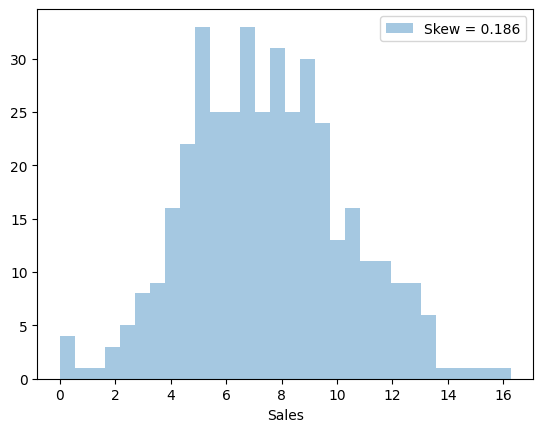

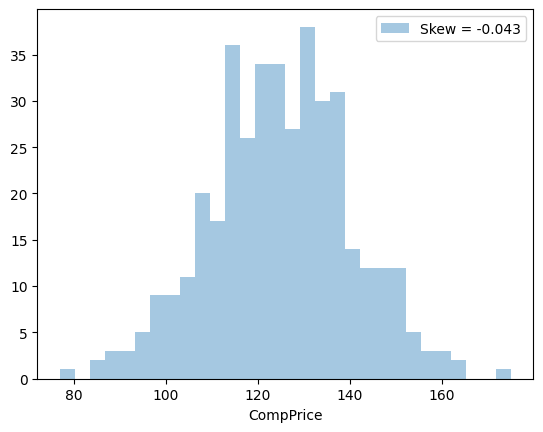

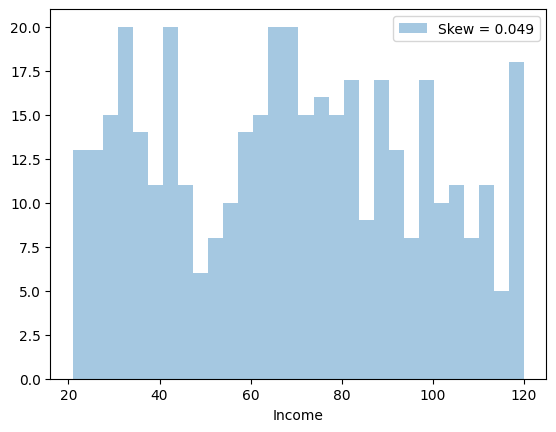

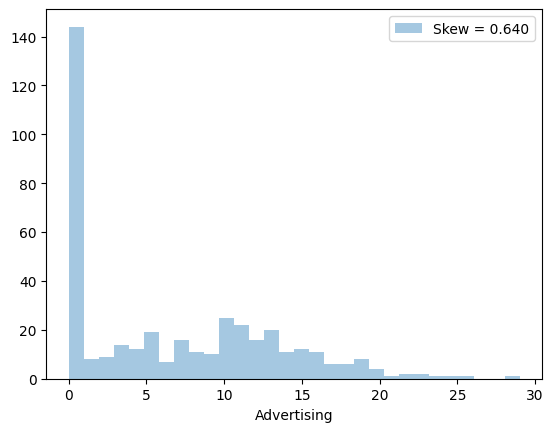

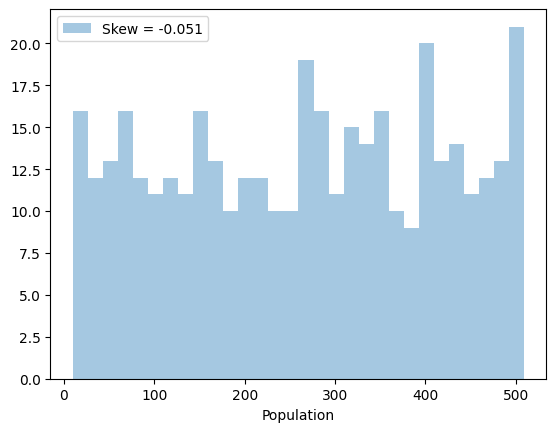

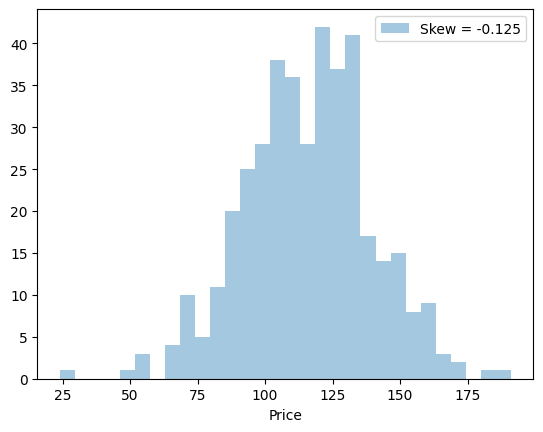

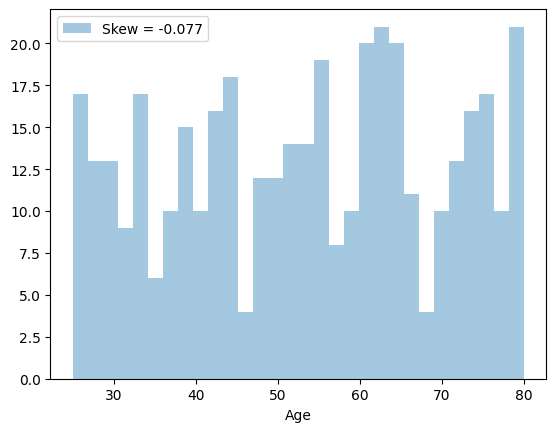

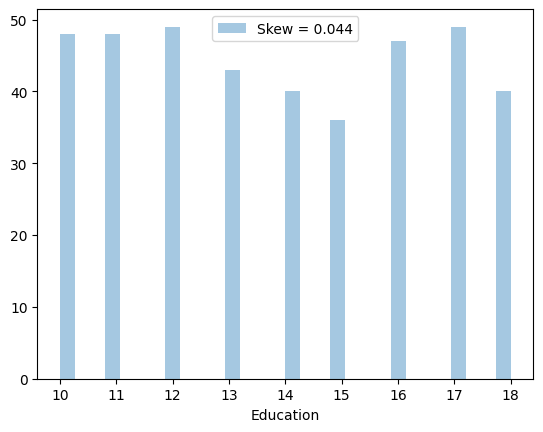

In [24]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes !='O']
for feat in numerical_features:
     skew = df[feat].skew()
     sns.distplot(df[feat], kde=False, label='Skew = %.3f' %(skew),bins=30)
     plt.legend(loc='best')
     plt.show()

None of the features is normally distributed. The features Fe, Ba, Ca and K exhibit the highest skew coefficients. Moreover, the distribution of potassium (K) and Barium (Ba) seem to contain many outliers. Let's identify the indices of the observations containing outliers using Turkey's method.

In [25]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returs a list of the indices
    corresponding to the observations containing more than 2 outliers.
    """
    outlier_indices = []

    # iterate over features(columns)
    for col in df.columns.tolist():
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        # Interquartile range(IQR)
        IQR = Q3 - Q1

        # Outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)]

        #append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > 2)

    return multiple_outliers

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[numerical_features]))))

The dataset contains 8 observations with more than 2 outliers


In [26]:
numerical_features


['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education']

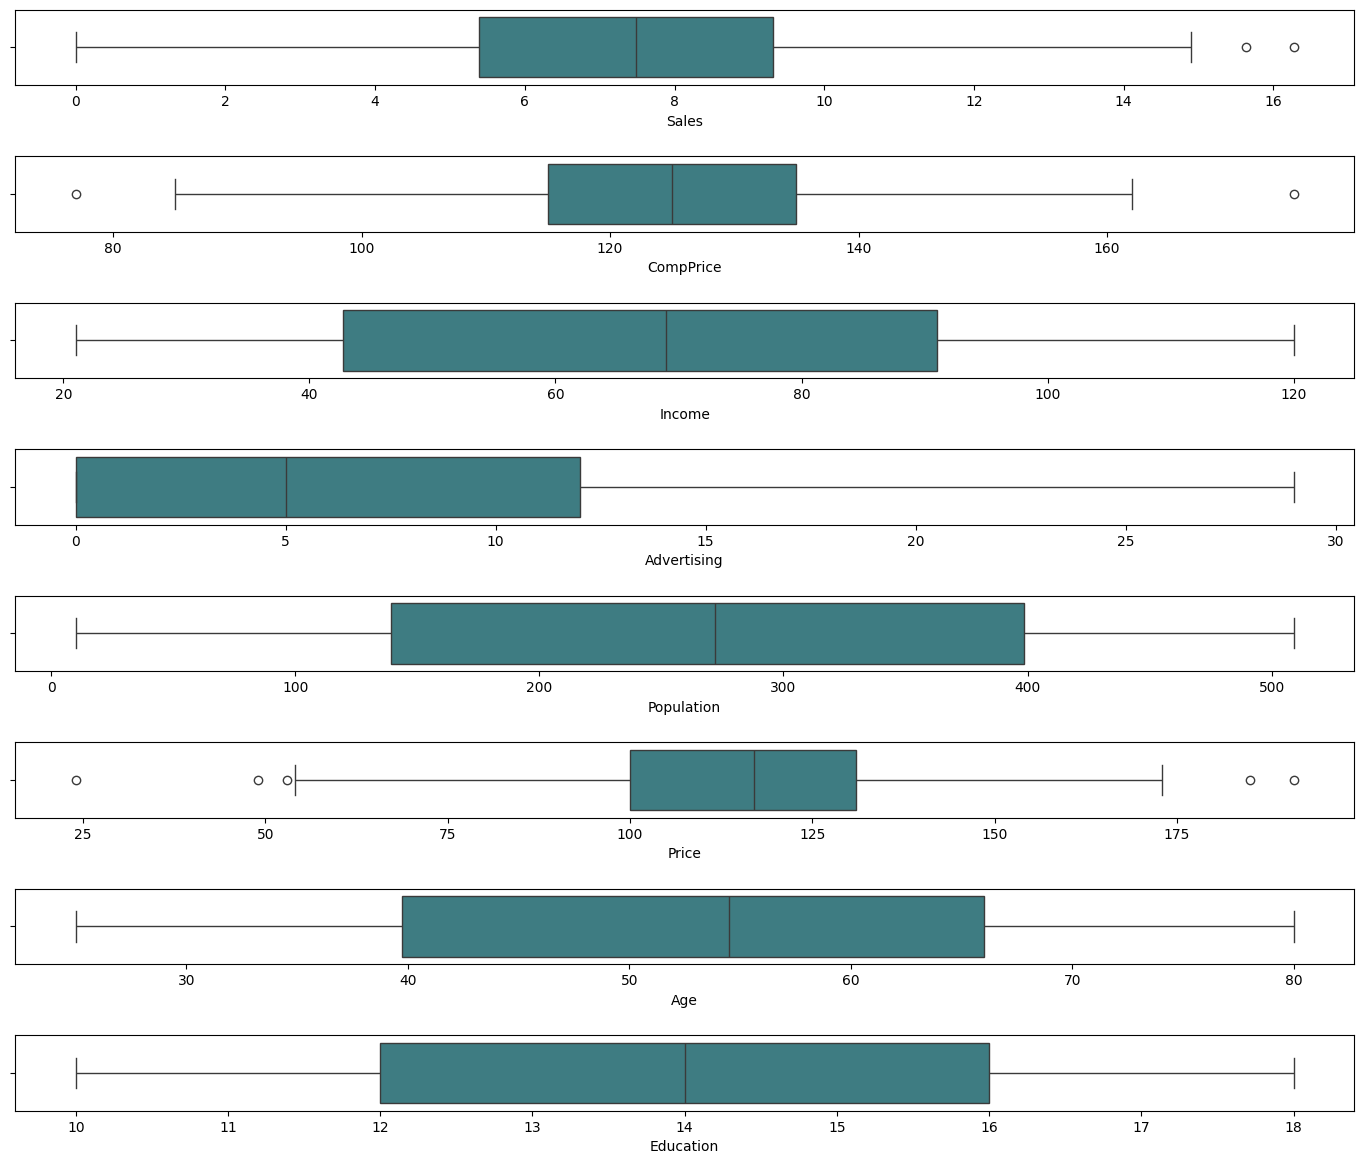

In [27]:
ot = df.copy()
fig, axes = plt.subplots(8, 1, figsize=(14,12), sharex =False, sharey=False)
sns.boxplot(x='Sales',data=ot, palette='crest', ax=axes[0])
sns.boxplot(x='CompPrice',data=ot, palette='crest', ax=axes[1])
sns.boxplot(x='Income',data=ot, palette='crest', ax=axes[2])
sns.boxplot(x='Advertising',data=ot, palette='crest', ax=axes[3])
sns.boxplot(x='Population',data=ot, palette='crest', ax=axes[4])
sns.boxplot(x='Price',data=ot, palette='crest', ax=axes[5])
sns.boxplot(x='Age',data=ot, palette='crest', ax=axes[6])
sns.boxplot(x='Education',data=ot, palette='crest', ax=axes[7])
plt.tight_layout(pad=2.0)

<Axes: >

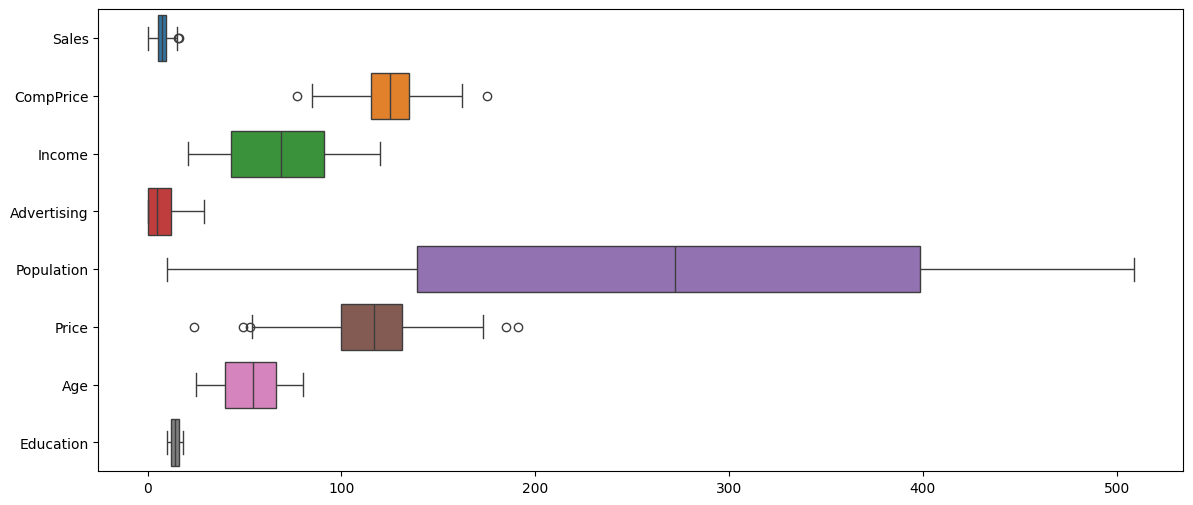

In [28]:
# outlier
plt.figure(figsize=(14,6))
sns.boxplot(data=df[numerical_features], orient='h')

Unsurprisingly, Population has a mean that is much superior to the other constituents as we already saw in the previous section.

# Multivariate Analysis

Let's now proceed by drawing a pairplot to visually examine the correlation between the features

<Figure size 800x800 with 0 Axes>

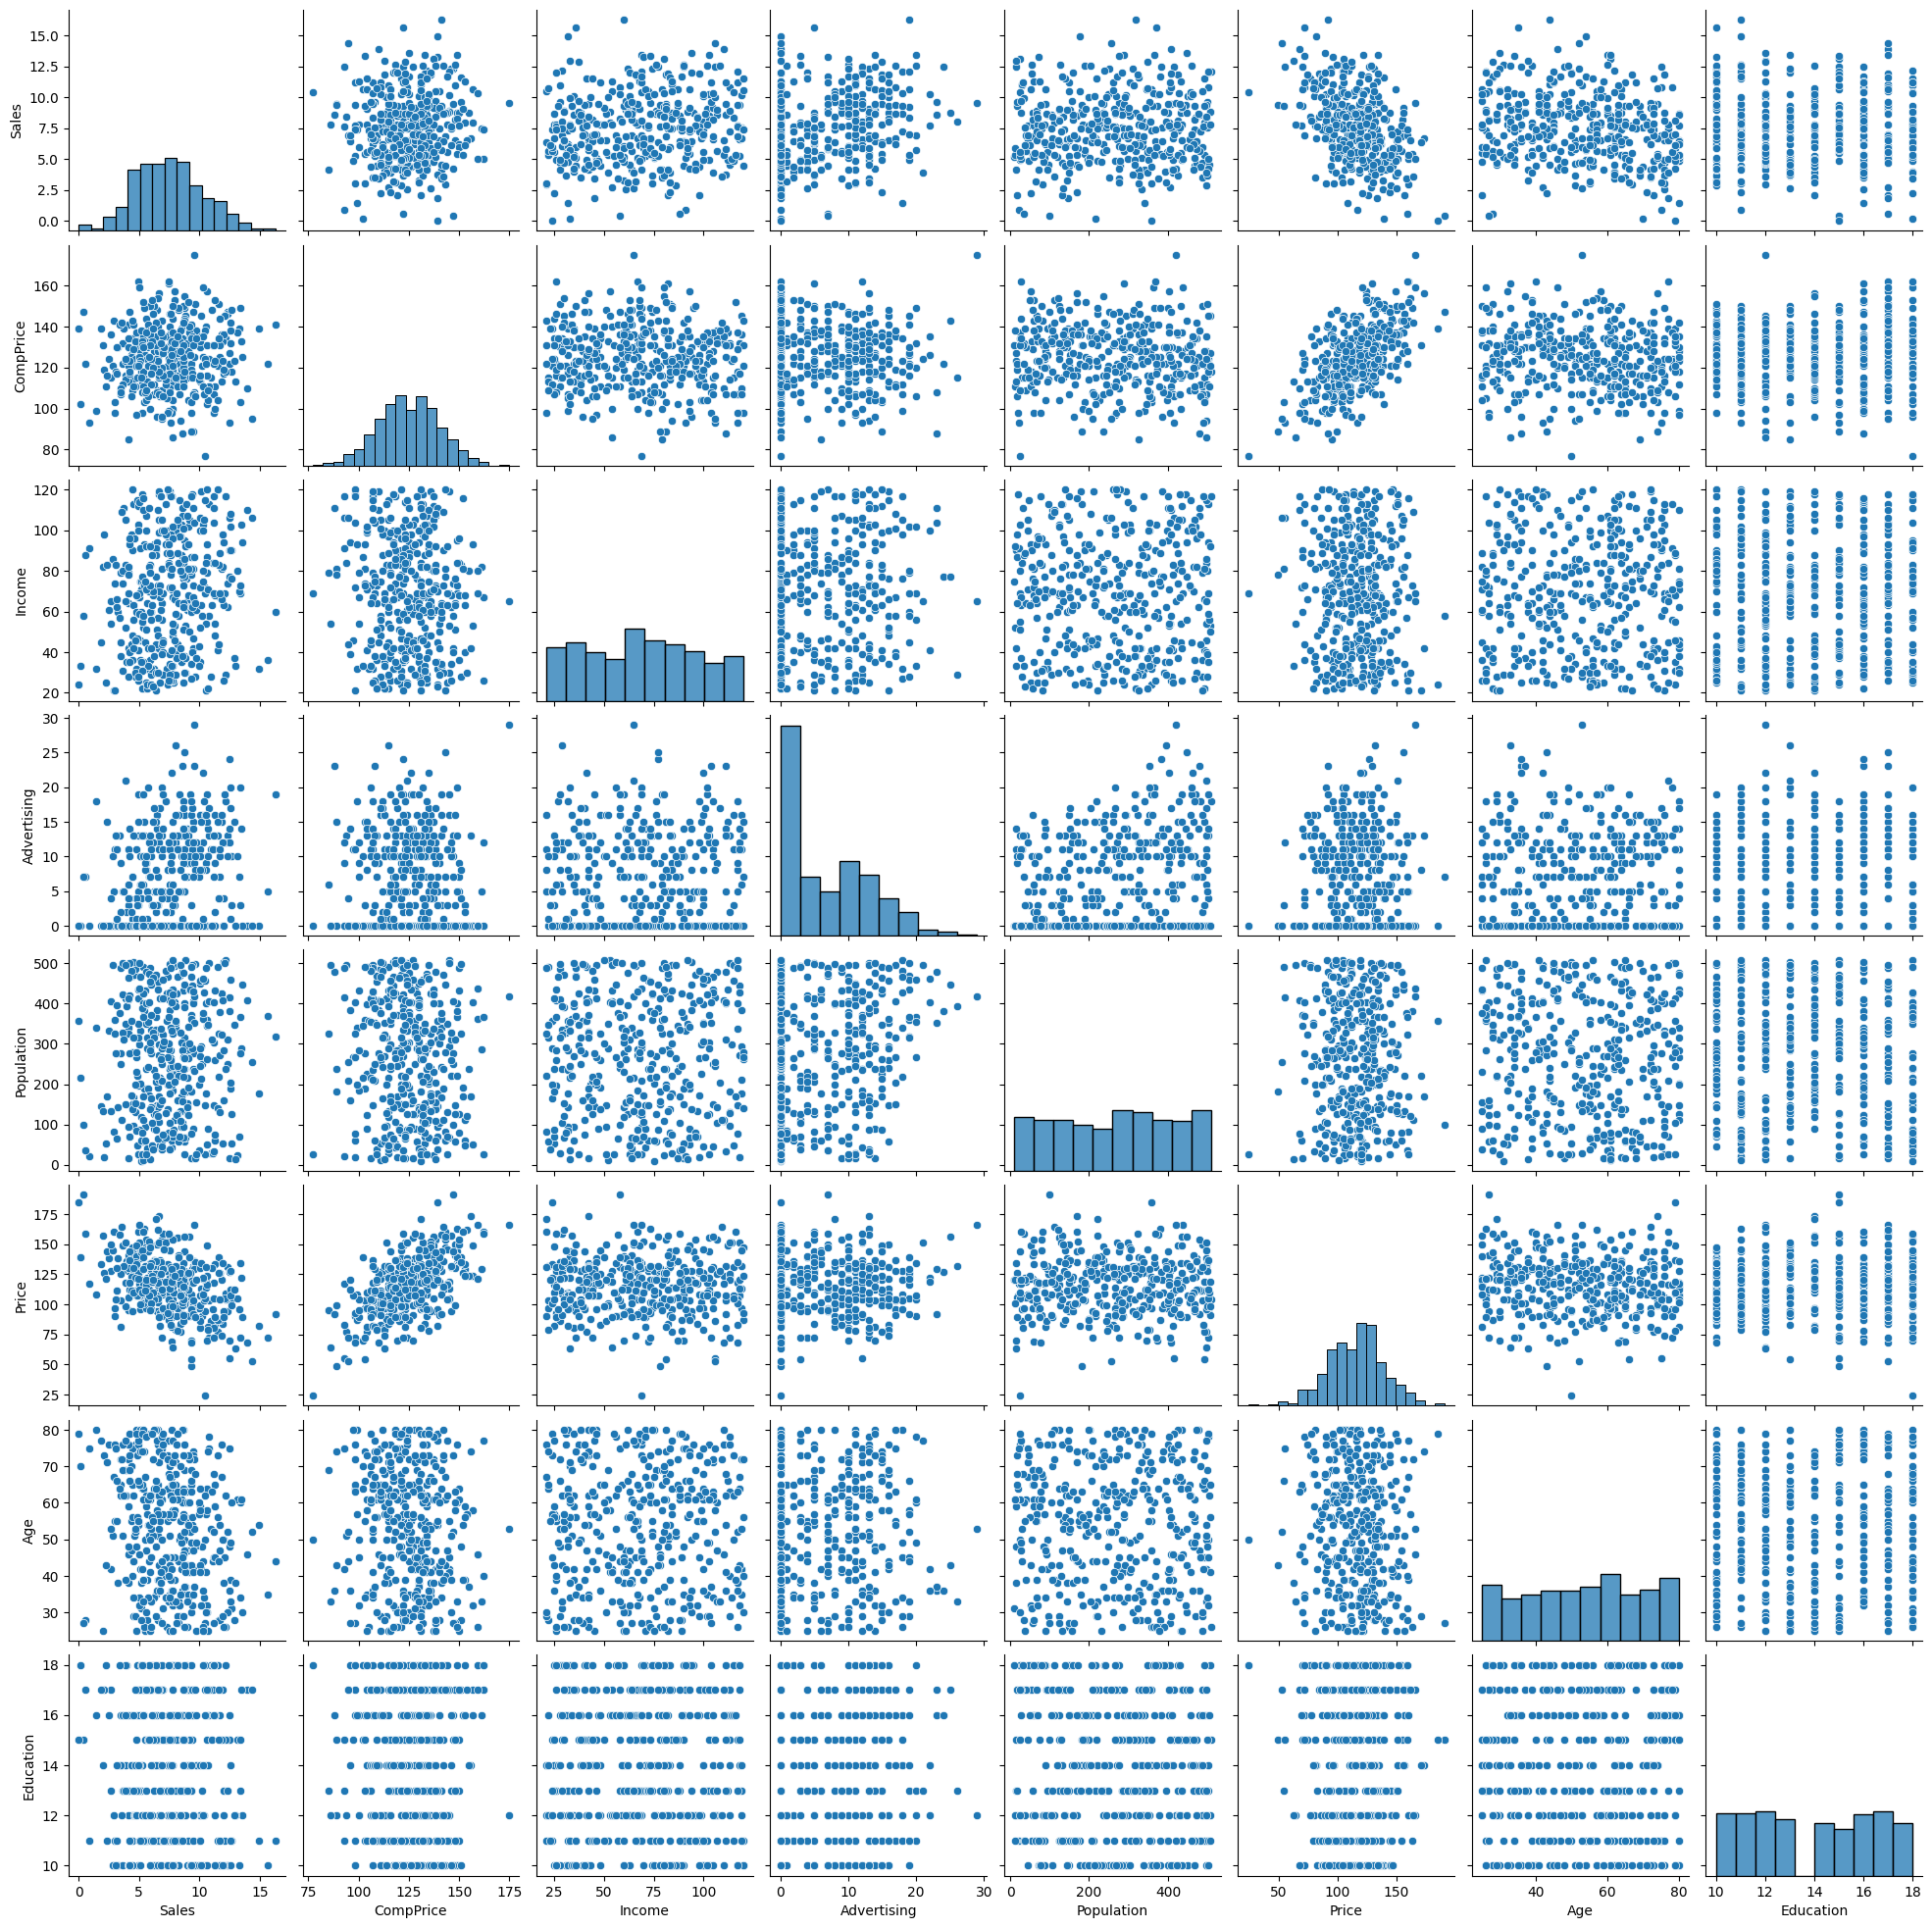

In [29]:
plt.figure(figsize=(8,8))
sns.pairplot(df, palette='coolwarm')
plt.show()

***Pearson's Correlation Coefficient***: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

<Axes: >

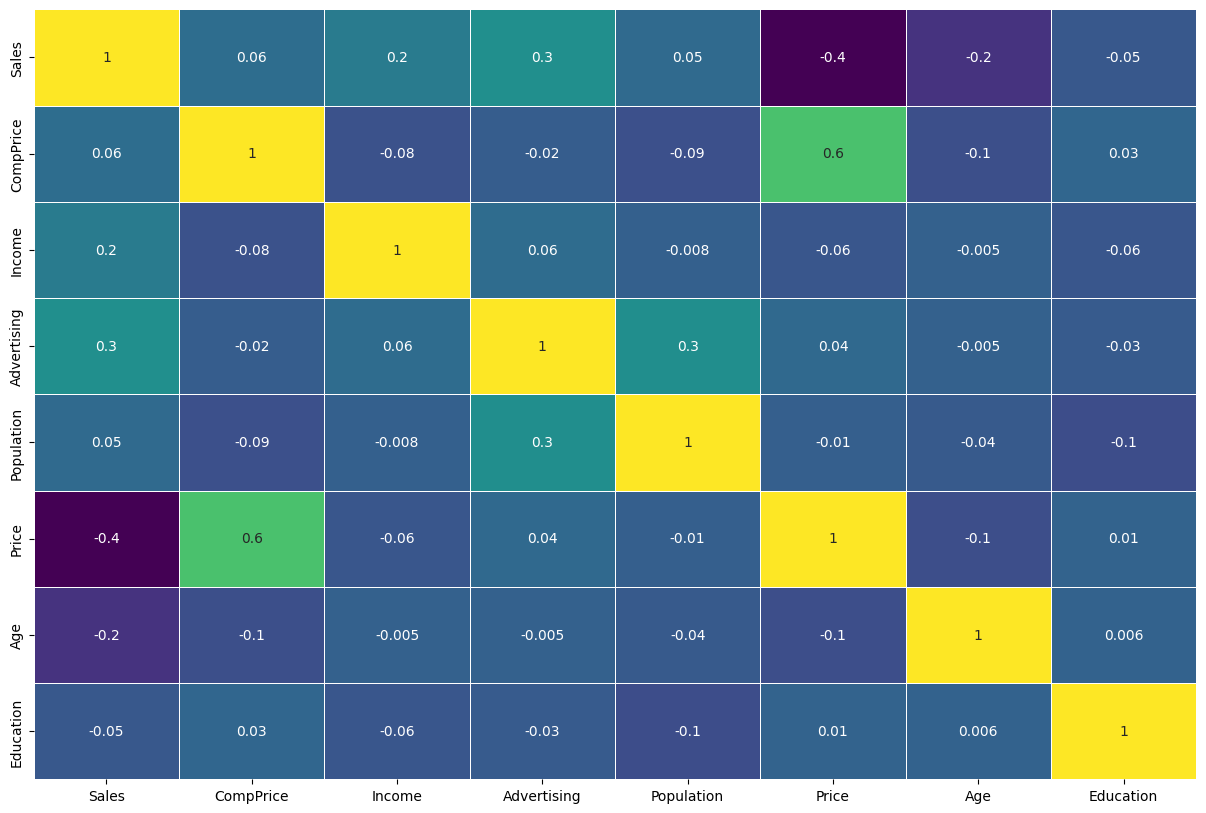

In [30]:
 # Having a look at the correlation matrix

 fig, ax = plt.subplots(figsize=(15,10))
 sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap='viridis', cbar=False, linewidths=0.5, edgecolors='black')

Index(['ShelveLoc', 'Urban', 'US', 'Sales_cat'], dtype='object')


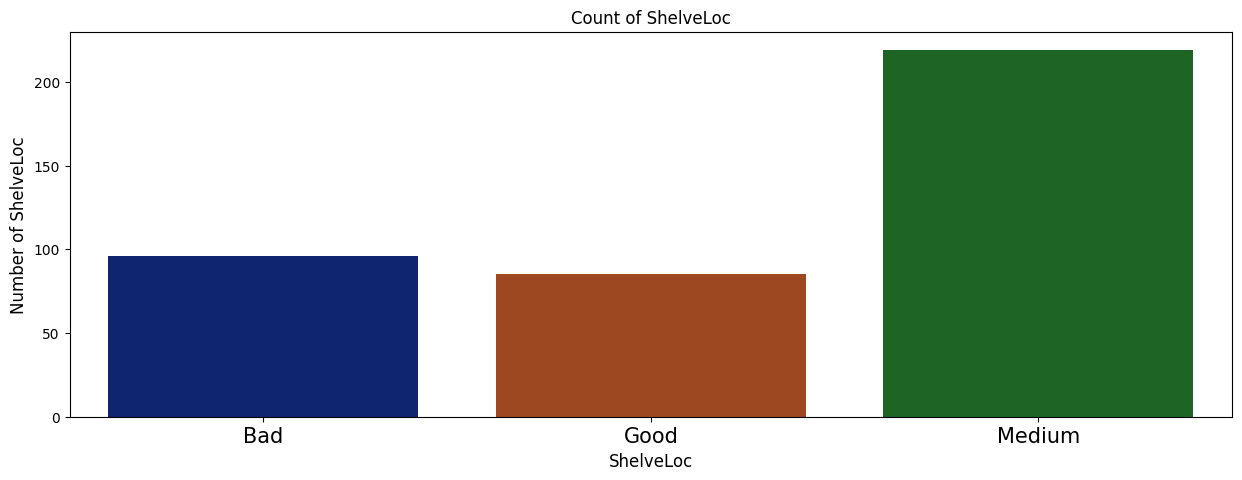

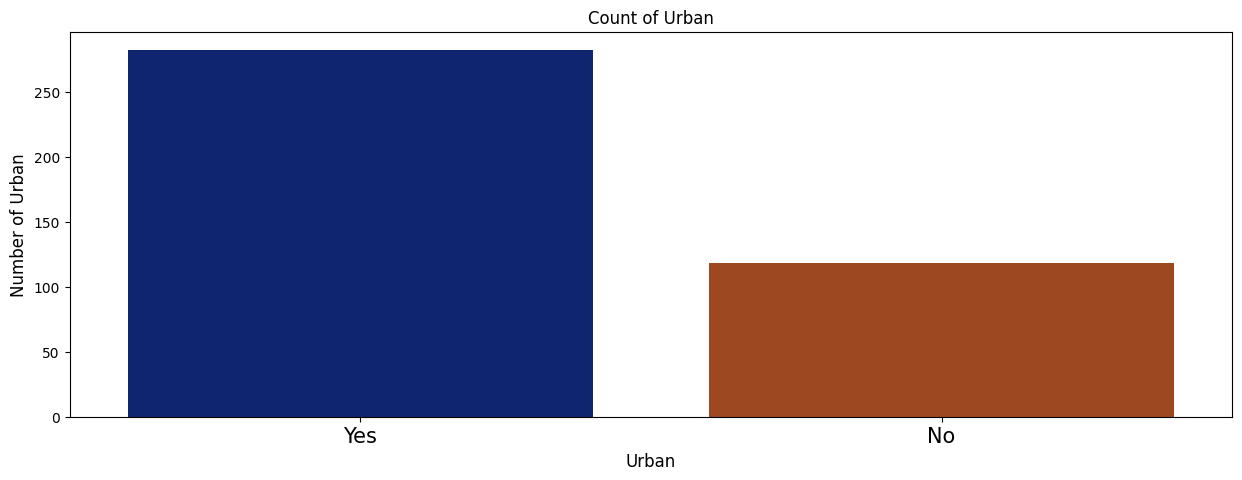

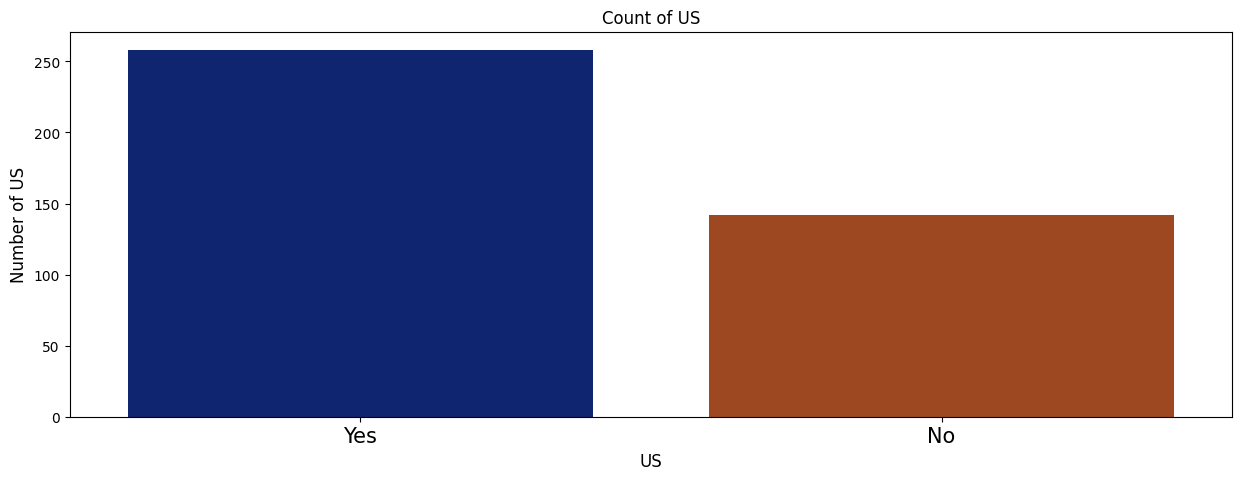

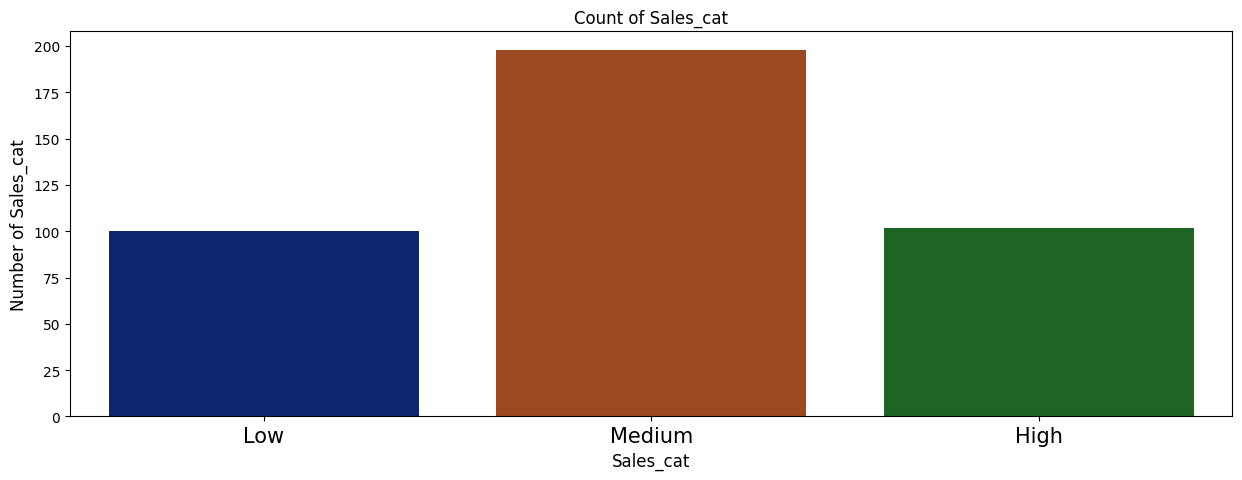

In [31]:
print(categorical_features)

for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(15,5))
    unique = df1[column].value_counts(ascending=True);

    # plt.subplot(1, len(categorical_features), idx+1)
    plt.title("Count of " + column)
    sns.countplot(data=df1, x=column, palette = 'dark')

    # plt.bar(unique.index, unique.values)
    plt.xticks(rotation = 0, size=15)

    plt.xlabel(column, fontsize=12)
    plt.ylabel('Number of ' + column, fontsize=12)

In [32]:
import seaborn as sns
sns.pairplot(data=df1, hue = 'Sales_cat')

Output hidden; open in https://colab.research.google.com to view.

In [33]:
data_ = df1.copy()
data_.drop('Sales', axis=1, inplace=True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

Text(0.5, 1.0, 'Correlation with Sales \n')

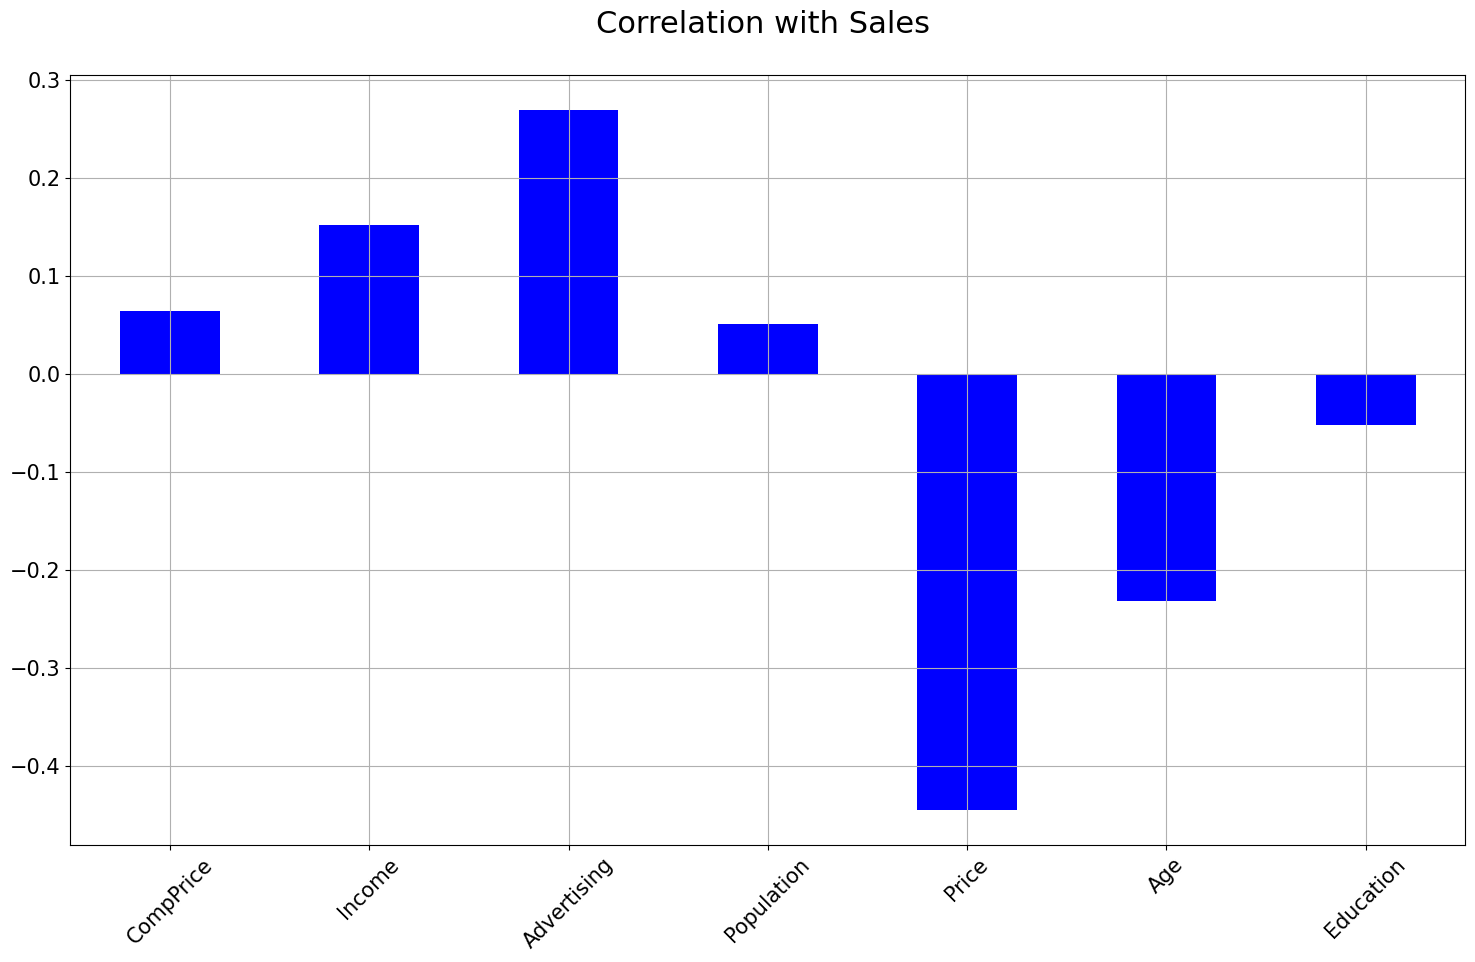

In [34]:
data2 = data.copy()

correlations = data2.corrwith(df1.Sales)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations > 0 ].sort_values(ascending=False)
negative_correlations = correlations[correlations < 0].sort_values(ascending = False )

correlations.plot.bar(
    figsize = (18, 10),
    fontsize = 15,
    color = 'blue',
    rot = 45, grid =True)
plt.title("Correlation with Sales \n",
          horizontalalignment='center', fontstyle='normal',
          fontsize='22', fontfamily = 'sans=serif')

# Checking for imbalanced or balanced dataset with regards to the Target

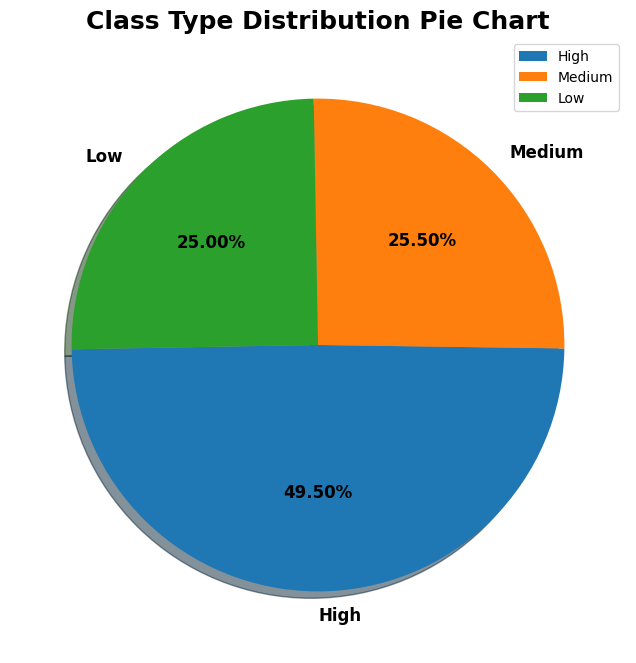

In [35]:
plt.figure(figsize = (12,8))
plt.pie(df1['Sales_cat'].value_counts(),
        labels=df1.Sales_cat.unique(),
        autopct = '%.2f%%',
        shadow = True,
        startangle = 181,
        textprops = {'size':'large',
                     'fontweight':'bold',
                     'rotation':'horizontal',
                     'color':'black'})
plt.legend(loc = 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

##### Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

Here, the class “High” is called the majority class, and the much smaller in size “Low” and “Medium” class is called the minority class.

In [36]:
df1.Sales_cat.value_counts()

Medium    198
High      102
Low       100
Name: Sales_cat, dtype: int64

Text(0.5, 1.0, 'Low Medium or Good for Sales')

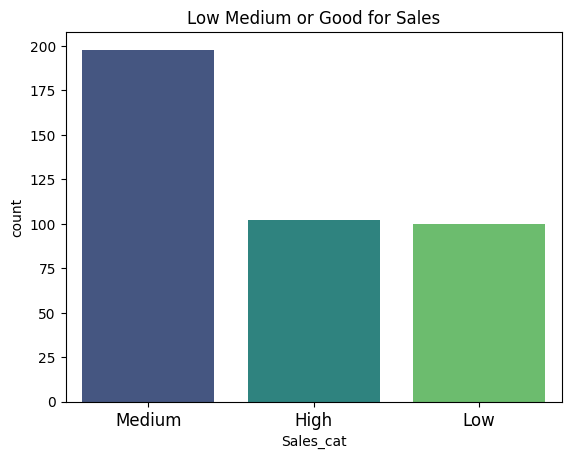

In [37]:
sns.countplot(x= 'Sales_cat',data = df1, palette = 'viridis',
              order=df1['Sales_cat'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title("Low Medium or Good for Sales")

### Problems with imbalanced data classification
If we explain it in a very simple manner, the main problem with imbalanced dataset prediction is how accurately are we actually predicting both majority and minority class?

Sometimes when the records of a certain class are much more than the other class, our classifier may get biased towards the prediction. In this case, the confusion matrix for the classification problem shows how well our model classifies the target classes and we arrive at the accuracy of the model from the confusion matrix.

It is calculated based on the total no of correct predictions by the model divided by the total no of predictions. In the an example case it is (0+95)/(0+95+0+5)=0.95 or 95%. It means that the model fails to identify the minority class yet the accuracy score of the model will be 95%

Thus our traditional approach of classification and model accuracy calculation is not useful in the case of the imbalanced dataset

##  Feature Selection Technique<a class="anchor" id="5"></a>

###  Data Pre-Processing<a class="anchor" id="5.1"></a>

In [38]:
data_ = df1.copy()
data_.drop("Sales", axis=1, inplace = True)
data_ = pd.get_dummies(data_.iloc[:, :-1])
data_.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

In [39]:
data_['Sales'] = df1.Sales_cat
data_.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes   Sales  
0      0       1    High  
1      0       1    High  
2      0       1    High  
3      0       1  Medium  
4      1       0     Low

In [41]:
le = LabelEncoder()
le.fit(data_['Sales'])
data_['Sales'] = le.transform(data_['Sales'])
data_.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  Sales  
0      0       1      0  
1      0       1      0  
2      0       1      0  
3      0       1      2  
4      1       0      1

In [42]:
# Split into input (X) and output (y) variables
X =  data_.iloc[:, :-1]

y = data_.Sales

In [44]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

In [45]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X,y)

In [46]:
# summarize scores
scores = fit.scores_

features = fit.transform(X)

In [47]:
score_df = pd.DataFrame(list(zip(scores, X.columns)),
                        columns=['Score', 'Feature'])
score_df.sort_values(by = 'Score', ascending = False, inplace = True)
score_df

Score           Feature
4   300.881058             Price
2   251.767458       Advertising
3   141.113336        Population
5   106.577639               Age
8    66.174919    ShelveLoc_Good
1    65.145403            Income
7    48.524460     ShelveLoc_Bad
12   13.109136             US_No
9     8.654770  ShelveLoc_Medium
13    7.215106            US_Yes
0     2.253637         CompPrice
6     0.689685         Education
10    0.163751          Urban_No
11    0.068520         Urban_Yes

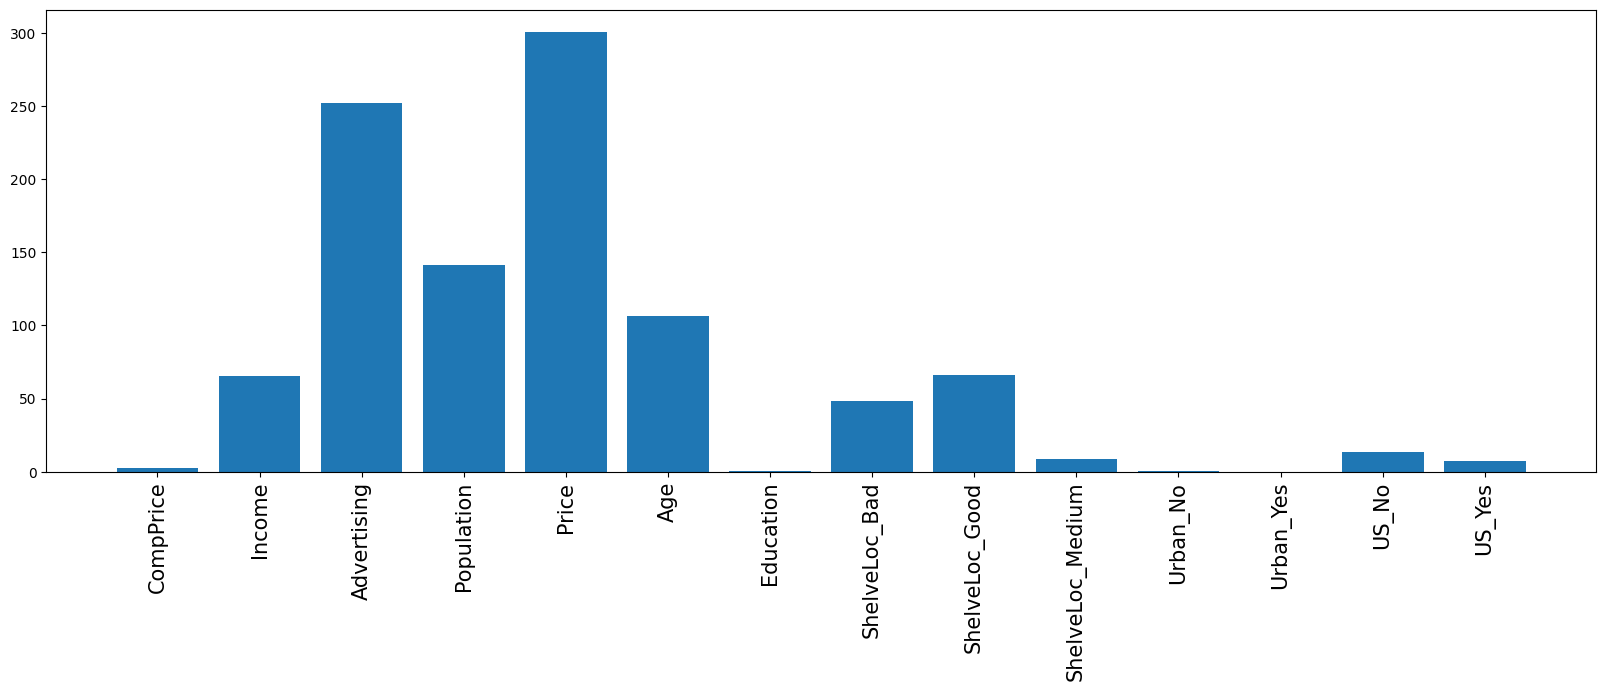

In [49]:
fig, axes = plt.subplots(figsize = (20,6))
plt.bar([i for i in range(len(scores))], scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
axes.set_xticklabels(X.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

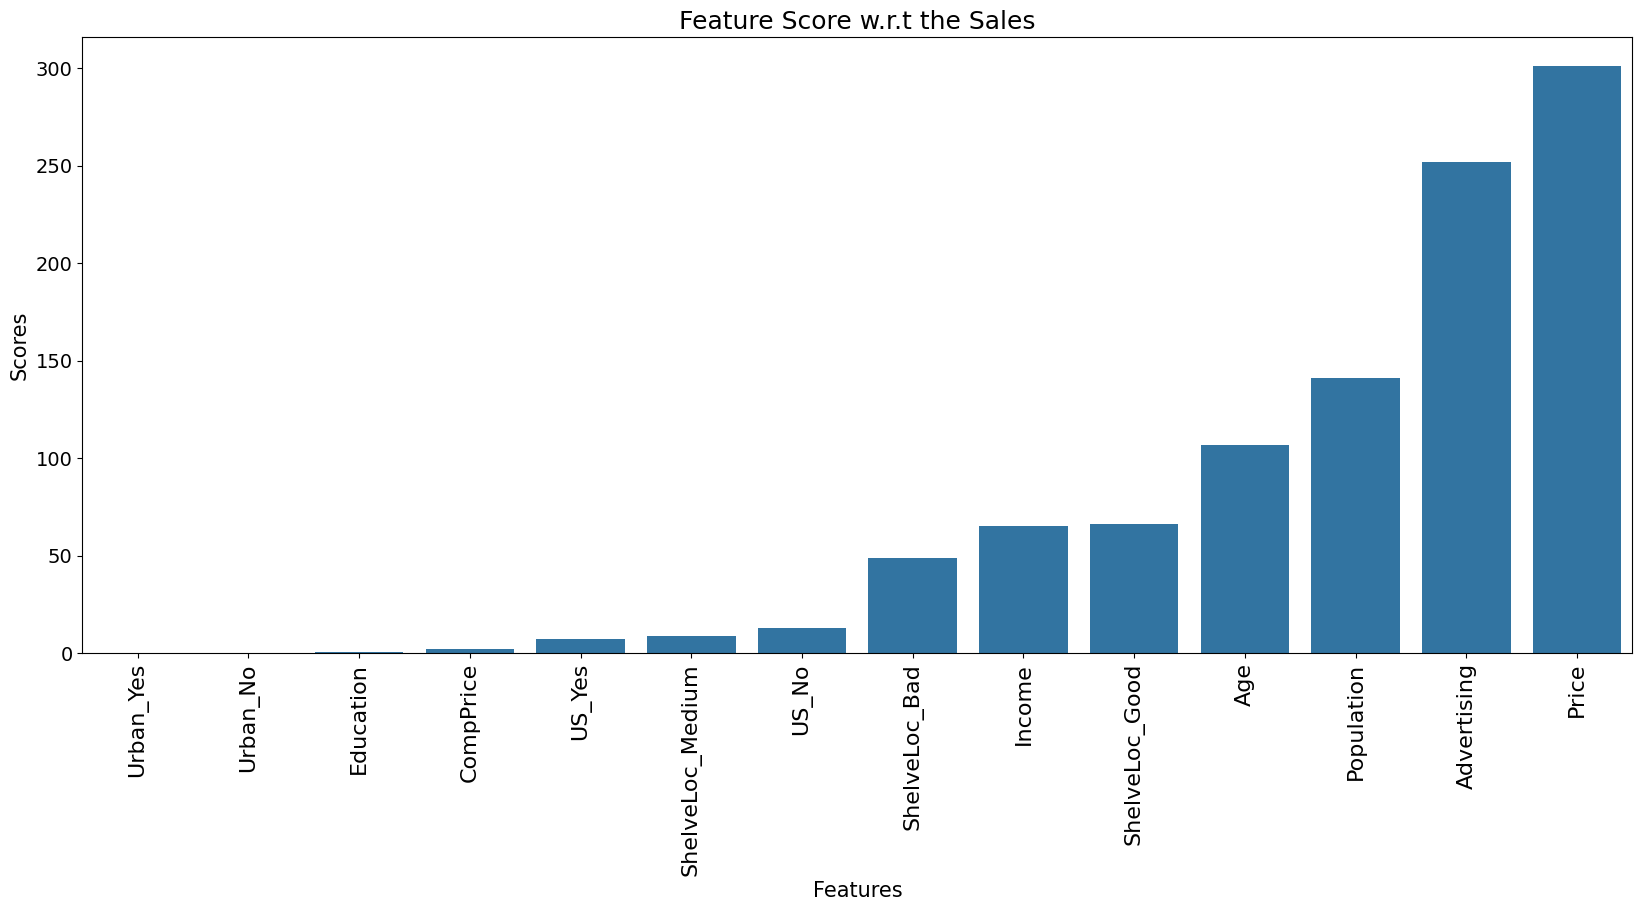

In [51]:
plt.figure(figsize=(20,8))
sns.barplot(x='Feature',
            y = 'Score',
            data = score_df,
            order = score_df.sort_values("Score").Feature)

# Set Labels
plt.xlabel("Features", size = 15)
plt.ylabel("Scores", size = 15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size = 18)
plt.show()

In [52]:
model_data = data_[['Price', 'Advertising', 'Population', 'Income', 'Age', 'ShelveLoc_Good', 'ShelveLoc_Bad', 'ShelveLoc_Medium','Sales']]
model_data.head()

Price  Advertising  Population  Income  Age  ShelveLoc_Good  ShelveLoc_Bad  \
0    120           11         276      73   42               0              1   
1     83           16         260      48   65               1              0   
2     80           10         269      35   59               0              0   
3     97            4         466     100   55               0              0   
4    128            3         340      64   38               0              1   

   ShelveLoc_Medium  Sales  
0                 0      0  
1                 0      0  
2                 1      0  
3                 1      2  
4                 0      1

###Test Train Split With Imbalanced Dataset<a class="anchor" id="5.2"></a>



***Train Test Split*** : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.

![](https://cdn-images-1.medium.com/max/1600/1*-8_kogvwmL1H6ooN1A1tsQ.png)

***Cross Validation***: When model is split into training and testing it can be possible that specific type of data point may go entirely into either training or testing portion. This would lead the model to perform poorly. Hence over-fitting and underfitting problems can be well avoided with cross validation techniques

![](https://cdn-images-1.medium.com/max/1600/1*4G__SV580CxFj78o9yUXuQ.png)



### ***About Stratify*** :
+ Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In machine learning, When we want to train our ML model we split our entire dataset into training_set and test_set using train_test_split() class present in sklearn. Then we train our model on training_set and test our model on test_set. The problems that we are going to face in this method are:

Whenever we change the random_state parameter present in train_test_split(), We get different accuracy for different random_state and hence we can’t exactly point out the accuracy for our model.
The train_test_split() splits the dataset into training_test and test_set by random sampling. But stratified sampling is performed.

What are random sampling and Stratified sampling?
Suppose you want to take a survey and decided to call 1000 people from a particular state, If you pick either 1000 males completely or 1000 females completely or 900 females and 100 males (randomly) to ask their opinion on a particular product. Then based on these 1000 opinions you can’t decide the opinion of that entire state on your product. This is random sampling.
But in Stratified Sampling, Let the population for that state be 51.3% male and 48.7% female, Then for choosing 1000 people from that state if you pick 513 male ( 51.3% of 1000 ) and 487 female ( 48.7% for 1000 ) i.e 513 male + 487 female (Total=1000 people) to ask their opinion. Then these groups of people represent the entire state. This is called Stratified Sampling.

Why random sampling is not preferred in machine learning?
Let’s consider a binary-class classification problem. Let our dataset consists of 100 samples out of which 80 are negative class { 0 } and 20 are positive class { 1 }.

Random sampling:
If we do random sampling to split the dataset into training_set and test_set in an 8:2 ratio respectively.Then we might get all negative class {0} in training_set i.e 80 samples in training_test and all 20 positive class {1} in test_set.Now if we train our model on training_set and test our model on test_set, Then obviously we will get a bad accuracy score.

Stratified Sampling:
In stratified sampling, The training_set consists of 64 negative class{0} ( 80% 0f 80 ) and 16 positive class {1} ( 80% of 20 ) i.e. 64{0}+16{1}=80 samples in training_set which represents the original dataset in equal proportion and similarly test_set consists of 16 negative class {0} ( 20% of 80 ) and 4 positive class{1} ( 20% of 20 ) i.e. 16{0}+4{1}=20 samples in test_set which also represents the entire dataset in equal proportion.This type of train-test-split results in good accuracy.

What is the solution to mentioned problems?
The solution for the first problem where we were able to get different accuracy scores for different random_state parameter values is to use K-Fold Cross-Validation. But K-Fold Cross Validation also suffers from the second problem i.e. random sampling.
The solution for both the first and second problems is to use Stratified K-Fold Cross-Validation.

What is Stratified K-Fold Cross Validation?
Stratified k-fold cross-validation is the same as just k-fold cross-validation, But Stratified k-fold cross-validation, it does stratified sampling instead of random sampling.

For Reference : https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

In [53]:
 x = model_data.drop('Sales', axis = 1)
 y = model_data['Sales']

In [54]:
y.unique()

array([0, 2, 1])

In [56]:
from sklearn.model_selection import StratifiedKFold

In [57]:
# Create StratifieldKFold object
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state=1)

# enumerate the splits and summarize the distributions
for train_ix, test_ix in skf.split(x,y):

  # select rows
    train_X, test_X = x.iloc[train_ix], x.loc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]

# Summarize train and test composition
counter_train = Counter(train_y)
counter_test = Counter(test_y)
print("Training Data", counter_train, 'Testing Data', counter_test)

Training Data Counter({2: 178, 0: 92, 1: 90}) Testing Data Counter({2: 20, 0: 10, 1: 10})


In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0, stratify=y)

In [60]:
# Summarize train and test composition
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print("Training Data", counter_train, 'Testing Data', counter_test)

Training Data Counter({2: 139, 0: 71, 1: 70}) Testing Data Counter({2: 59, 0: 31, 1: 30})


In [61]:
print("Shape of X_train:", x_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (280, 8)
Shape of X_test: (120, 8)
Shape of y_train: (280,)
Shape of y_test: (120,)


In [73]:
model_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
model_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

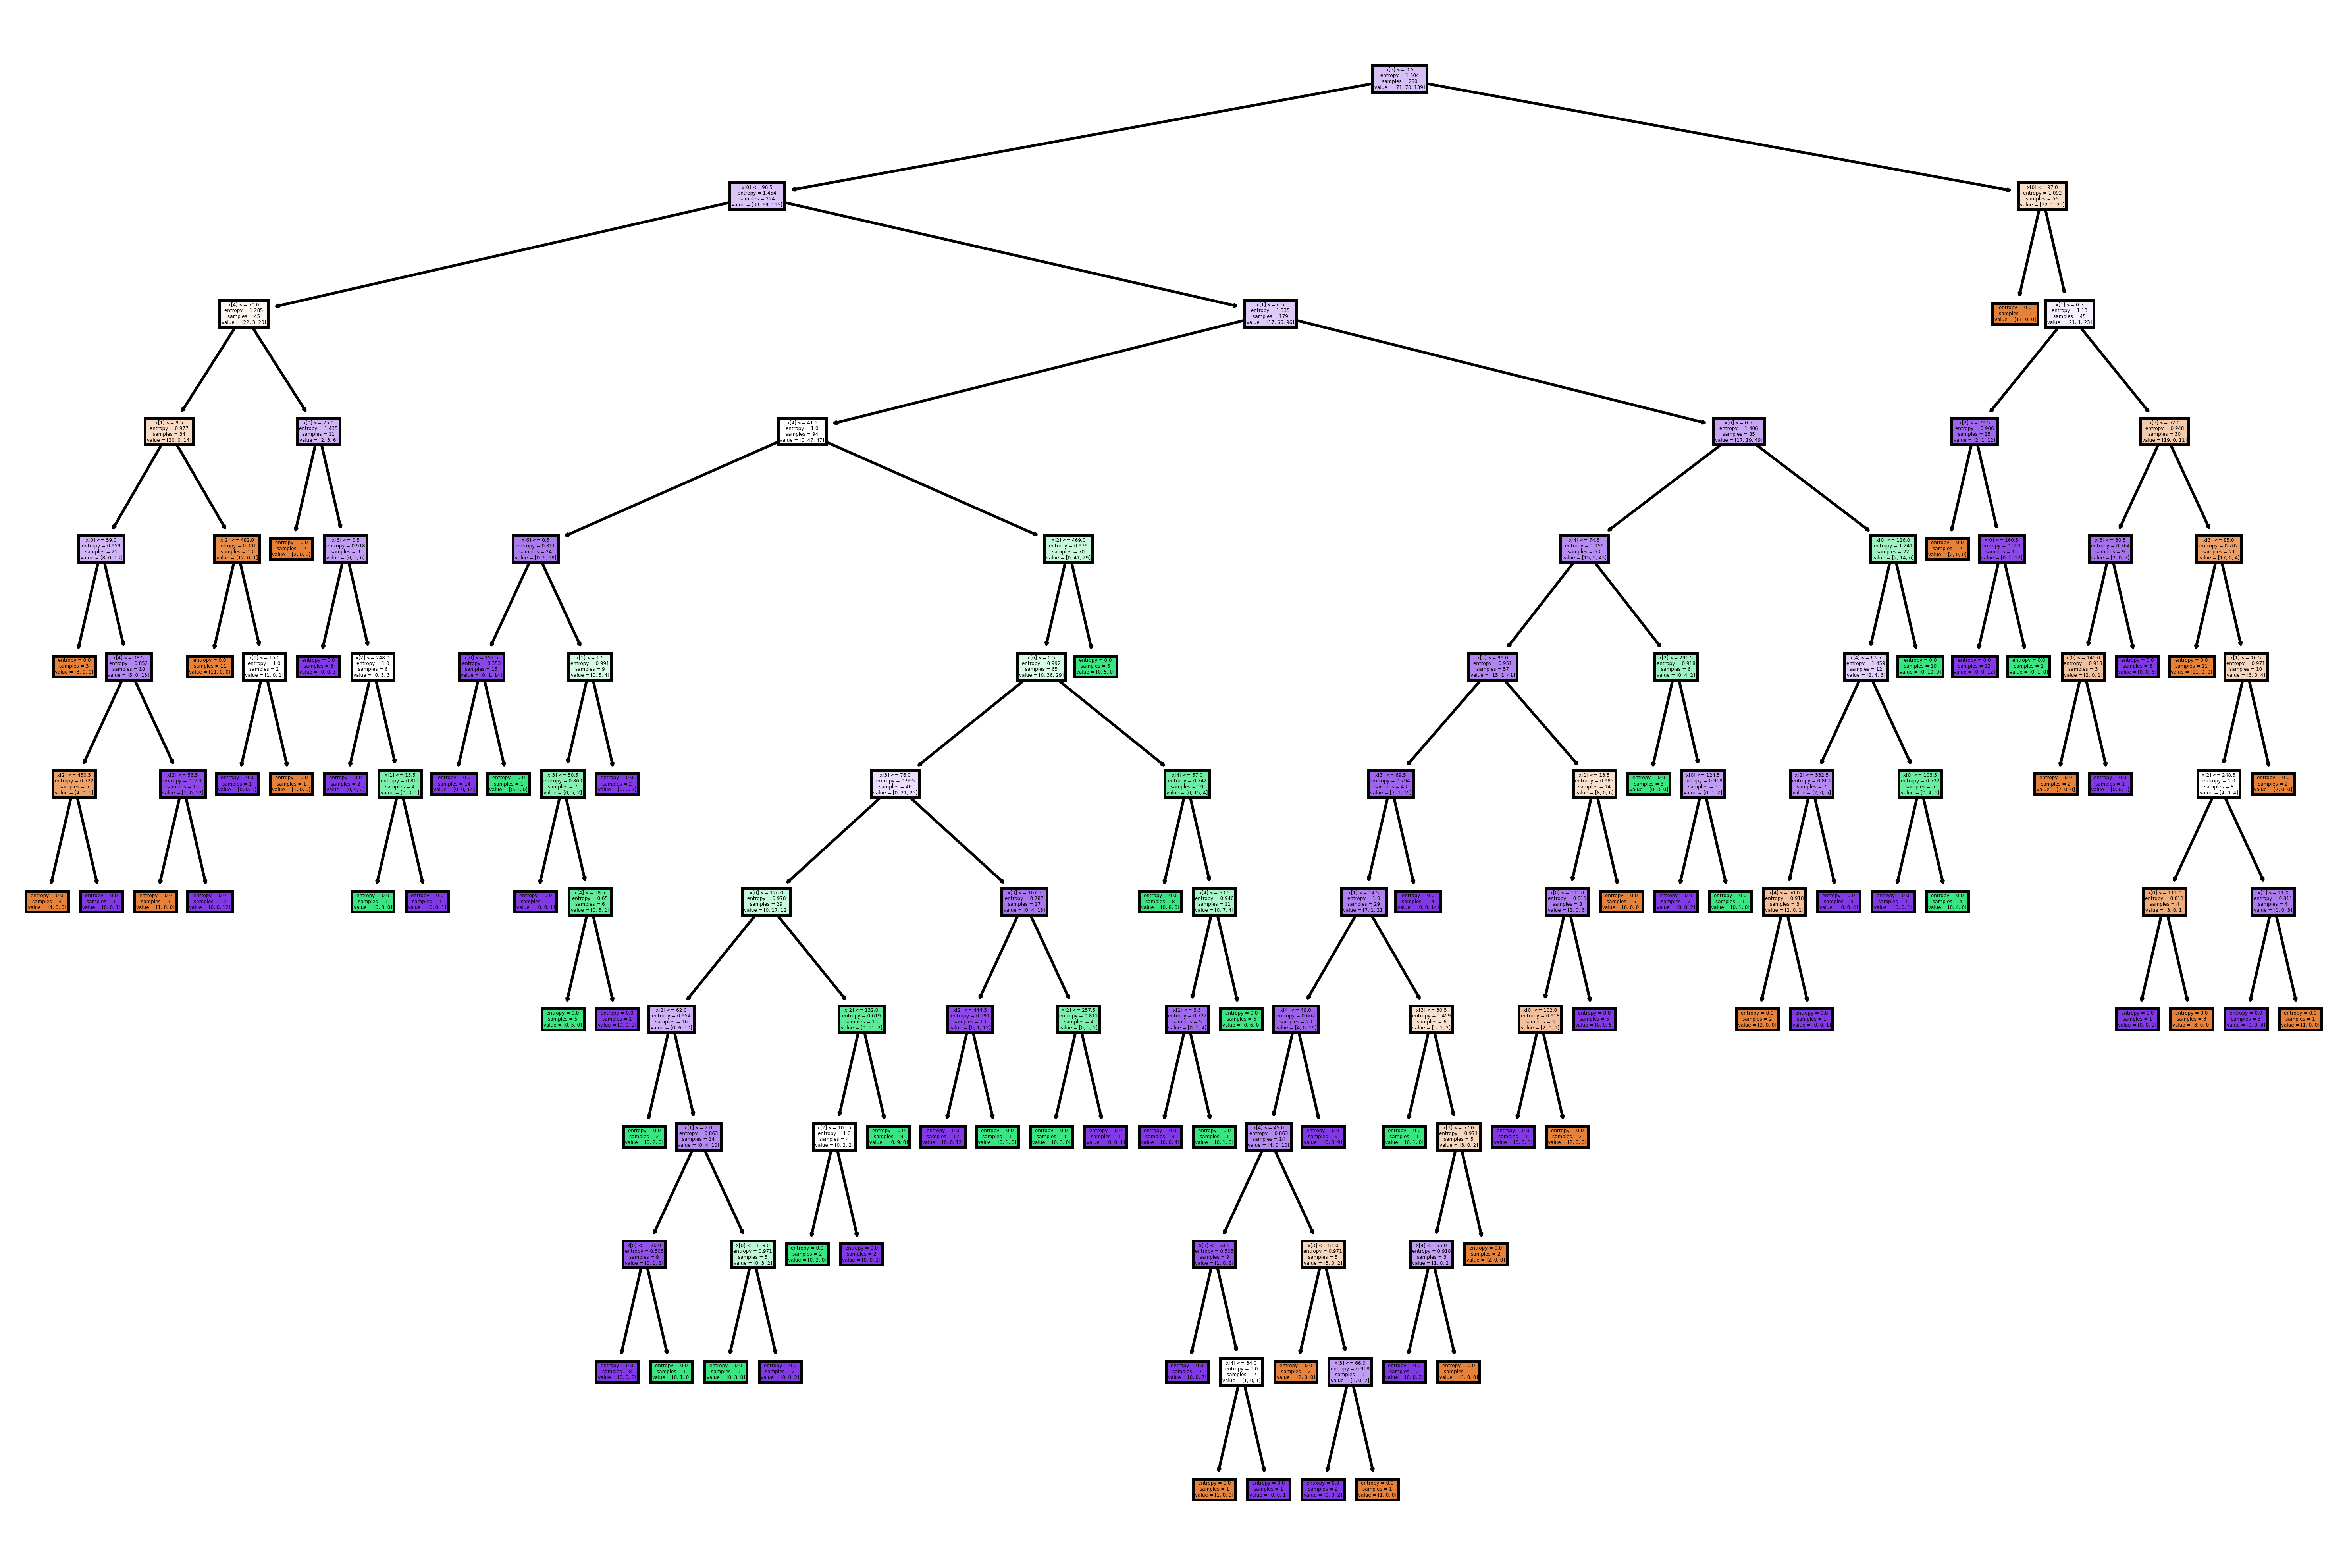

In [75]:
plt.figure(figsize = (15,10), dpi = 500)
tree.plot_tree(model_entropy, filled=True)
plt.show()

In [76]:
# Predicting on test data
preds = model_entropy.predict(x_test)
pd.Series(preds).value_counts()

2    57
1    32
0    31
dtype: int64

In [77]:
pd.crosstab(y_test, preds)

col_0   0   1   2
Sales            
0      20   0  11
1       0  16  14
2      11  16  32

In [78]:
# Accuracy
np.mean(preds == y_test)

0.5666666666666667

In [80]:
# Classification Report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65        31
           1       0.50      0.53      0.52        30
           2       0.56      0.54      0.55        59

    accuracy                           0.57       120
   macro avg       0.57      0.57      0.57       120
weighted avg       0.57      0.57      0.57       120



In [81]:
path = model_entropy.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [86]:
clfs = [ ]
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='entropy', random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.12182784023694593


For the remainder of this example, we remove the last element in `clfs` and `ccp_alphas`, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

### Accuracy vs alpha for training and testing sets<a class="anchor" id="8.1.1"></a>
When `ccp_alpha` is set to zero and keeping the other default parameters of :class:`DecisionTreeClassifier`, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting `ccp_alpha=0.015` maximizes the testing accuracy.

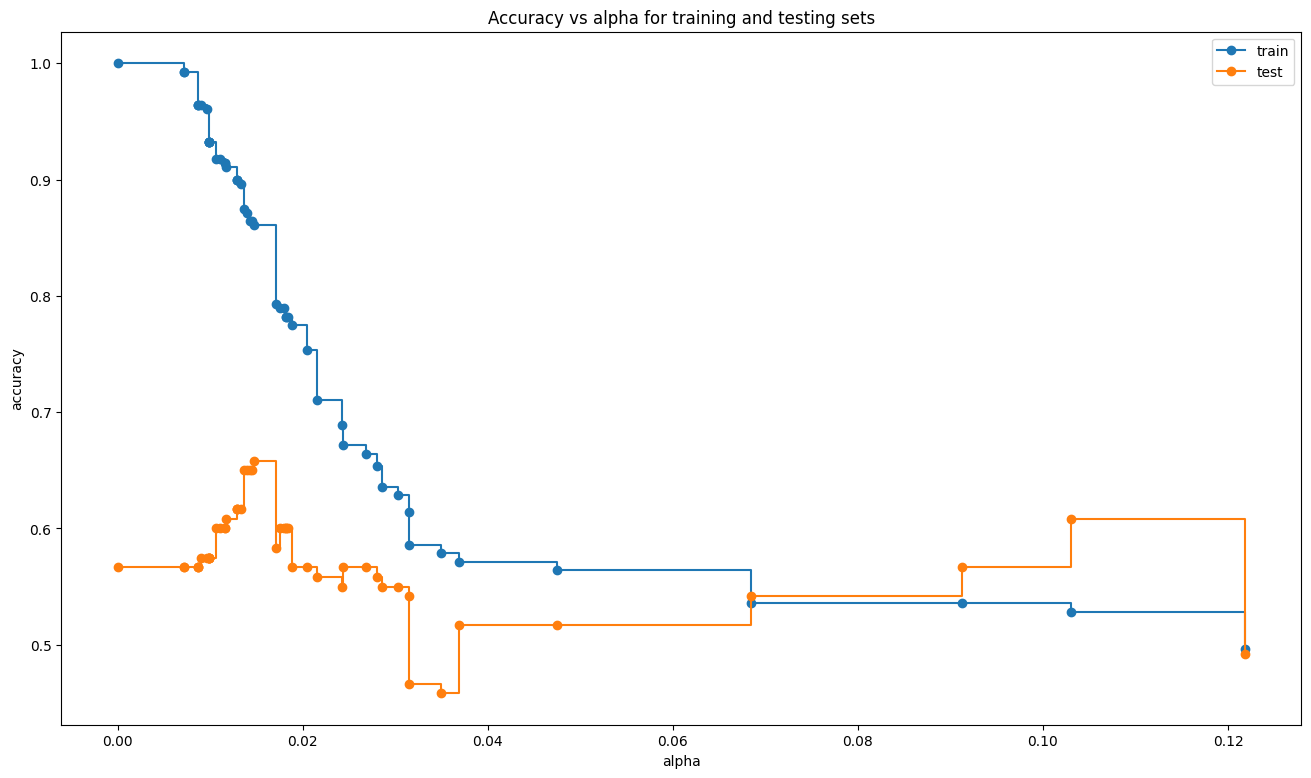

In [87]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel("alpha")
ax.set_ylabel('accuracy')
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label='train',
        drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test',
        drawstyle='steps-post')
ax.legend()
plt.show()

In [88]:
ccp_alphas

array([0.        , 0.00714286, 0.00714286, 0.0086692 , 0.0086692 ,
       0.0086692 , 0.0090333 , 0.00964146, 0.00983888, 0.00983888,
       0.00983888, 0.00983888, 0.00983888, 0.01061867, 0.01102202,
       0.01158969, 0.01159862, 0.01173913, 0.01289157, 0.01289157,
       0.01289157, 0.01334049, 0.01363477, 0.01392905, 0.01428571,
       0.01447132, 0.01472483, 0.01711208, 0.01751825, 0.01800818,
       0.01816488, 0.01816488, 0.01843463, 0.01884105, 0.02042347,
       0.02150212, 0.0242295 , 0.0243311 , 0.02687294, 0.02806532,
       0.02861818, 0.03034872, 0.0314684 , 0.03152372, 0.03494635,
       0.03684697, 0.04751692, 0.06842483, 0.09124924, 0.1030023 ,
       0.12182784])

In [89]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=0, ccp_alpha=0.03366643)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.03366643, criterion='entropy',
                       random_state=0)

In [91]:
pred_test = clf.predict(x_test)
pred_train = clf.predict(x_train)
from sklearn.metrics import accuracy_score
print("Training Accuracy:", accuracy_score(y_train, pred_train))
print("Testing Accuracy:", accuracy_score(y_test, pred_test))

Training Accuracy: 0.5857142857142857
Testing Accuracy: 0.4666666666666667


              precision    recall  f1-score   support

           0       0.50      0.39      0.44        31
           1       0.44      0.77      0.56        30
           2       0.48      0.36      0.41        59

    accuracy                           0.47       120
   macro avg       0.47      0.50      0.47       120
weighted avg       0.47      0.47      0.45       120



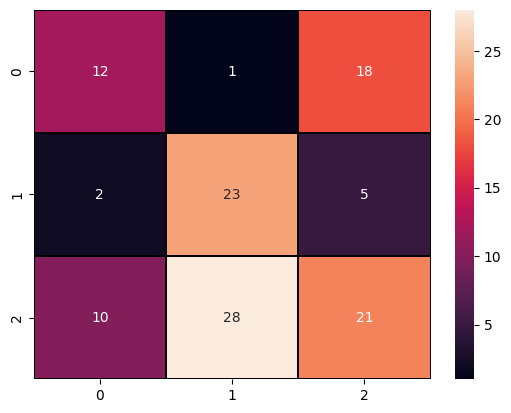

In [93]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, pred_test), annot=True, fmt='d', linecolor='k', linewidths=0.1)
print(classification_report(y_test, pred_test))

+ Below diagram explains the general structure of a decision tree:
![image.png](attachment:image.png)
##### Before learning more about decision trees let’s get familiar with some of the terminologies.
<b>Root Nodes</b> – `It is the node present at the beginning of a decision tree from this node the population starts dividing according to various features.`

<b>Decision Nodes</b> – `the nodes we get after splitting the root nodes are called Decision Node`

<b>Leaf Nodes</b> – `Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node.`

<b>Branch/Sub-tree</b> – `just like a small portion of a graph is called sub-graph similarly a sub-section of this decision tree is called sub-tree.`

<b>Pruning</b> – `is nothing but cutting down some nodes to stop overfitting.`

<b>Splitting</b> - `Splitting is the process of dividing the decision node/root node into sub-nodes according to the given conditions.`

<b>Pruning</b> - `Pruning is the process of removing the unwanted branches from the tree`

<b>Parent/Child node</b> - `The root node of the tree is called the parent node, and other nodes are called the child nodes.`

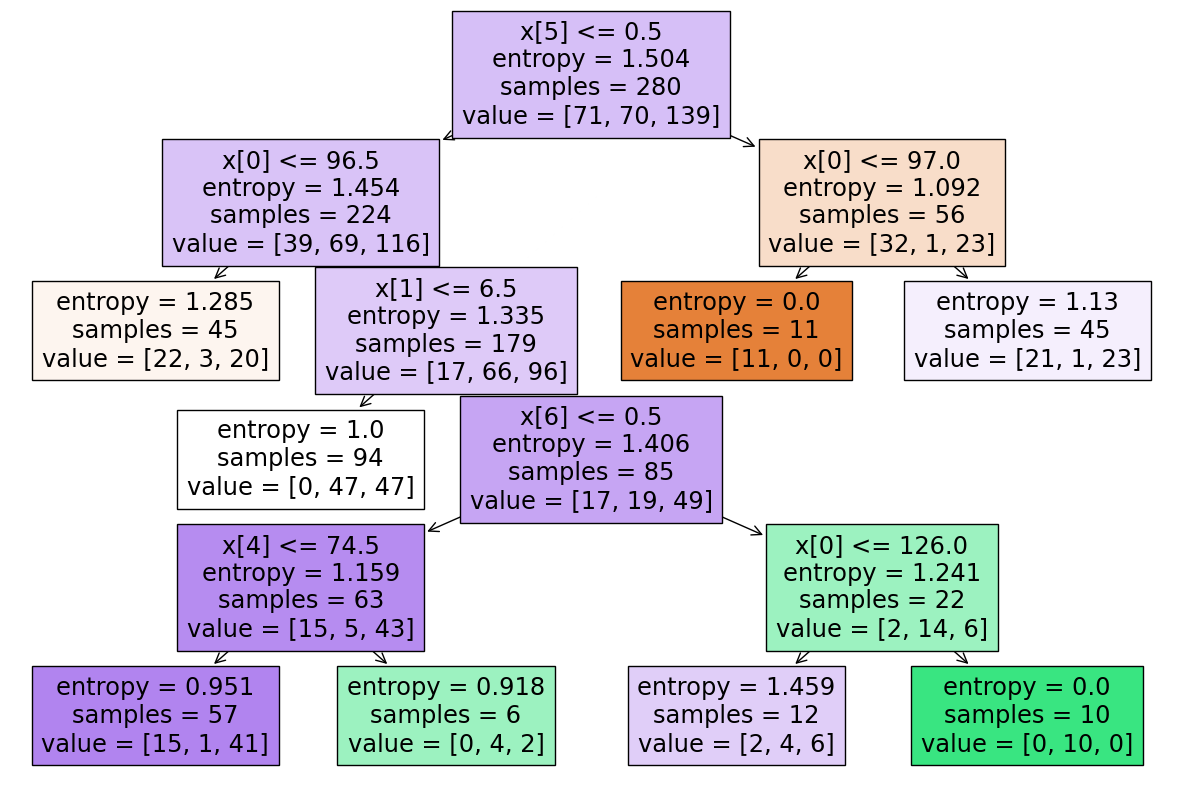

In [94]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True)
plt.show()

###Building Decision Tree Classifier using Gini Criteria with Alpha values Post Pruning<a class="anchor" id="8.2"></a>

#### Post pruning decision trees with cost complexity pruning
.. currentmodule:: sklearn.tree

The :class:`DecisionTreeClassifier` provides parameters such as `min_samples_leaf` and `max_depth` to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In :class:`DecisionTreeClassifier`, this pruning technique is parameterized by the cost complexity parameter, `ccp_alpha`. Greater values of `ccp_alpha` increase the number of nodes pruned. Here we only show the effect of `ccp_alpha` on regularizing the trees and how to choose a `ccp_alpha` based on validation scores.

See also `minimal_cost_complexity_pruning` for details on pruning.

### Gini Index:
+ Gini index is a measure of impurity or purity used while creating a decision tree in the CART(Classification and Regression Tree) algorithm.
+ An attribute with the low Gini index should be preferred as compared to the high Gini index.
+ It only creates binary splits, and the CART algorithm uses the Gini index to create binary splits.
+ Gini index can be calculated using the below formula:

**`Gini Index= 1- ∑jPj2`**


In [95]:
model_gini = DecisionTreeClassifier(criterion='gini', random_state=0)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

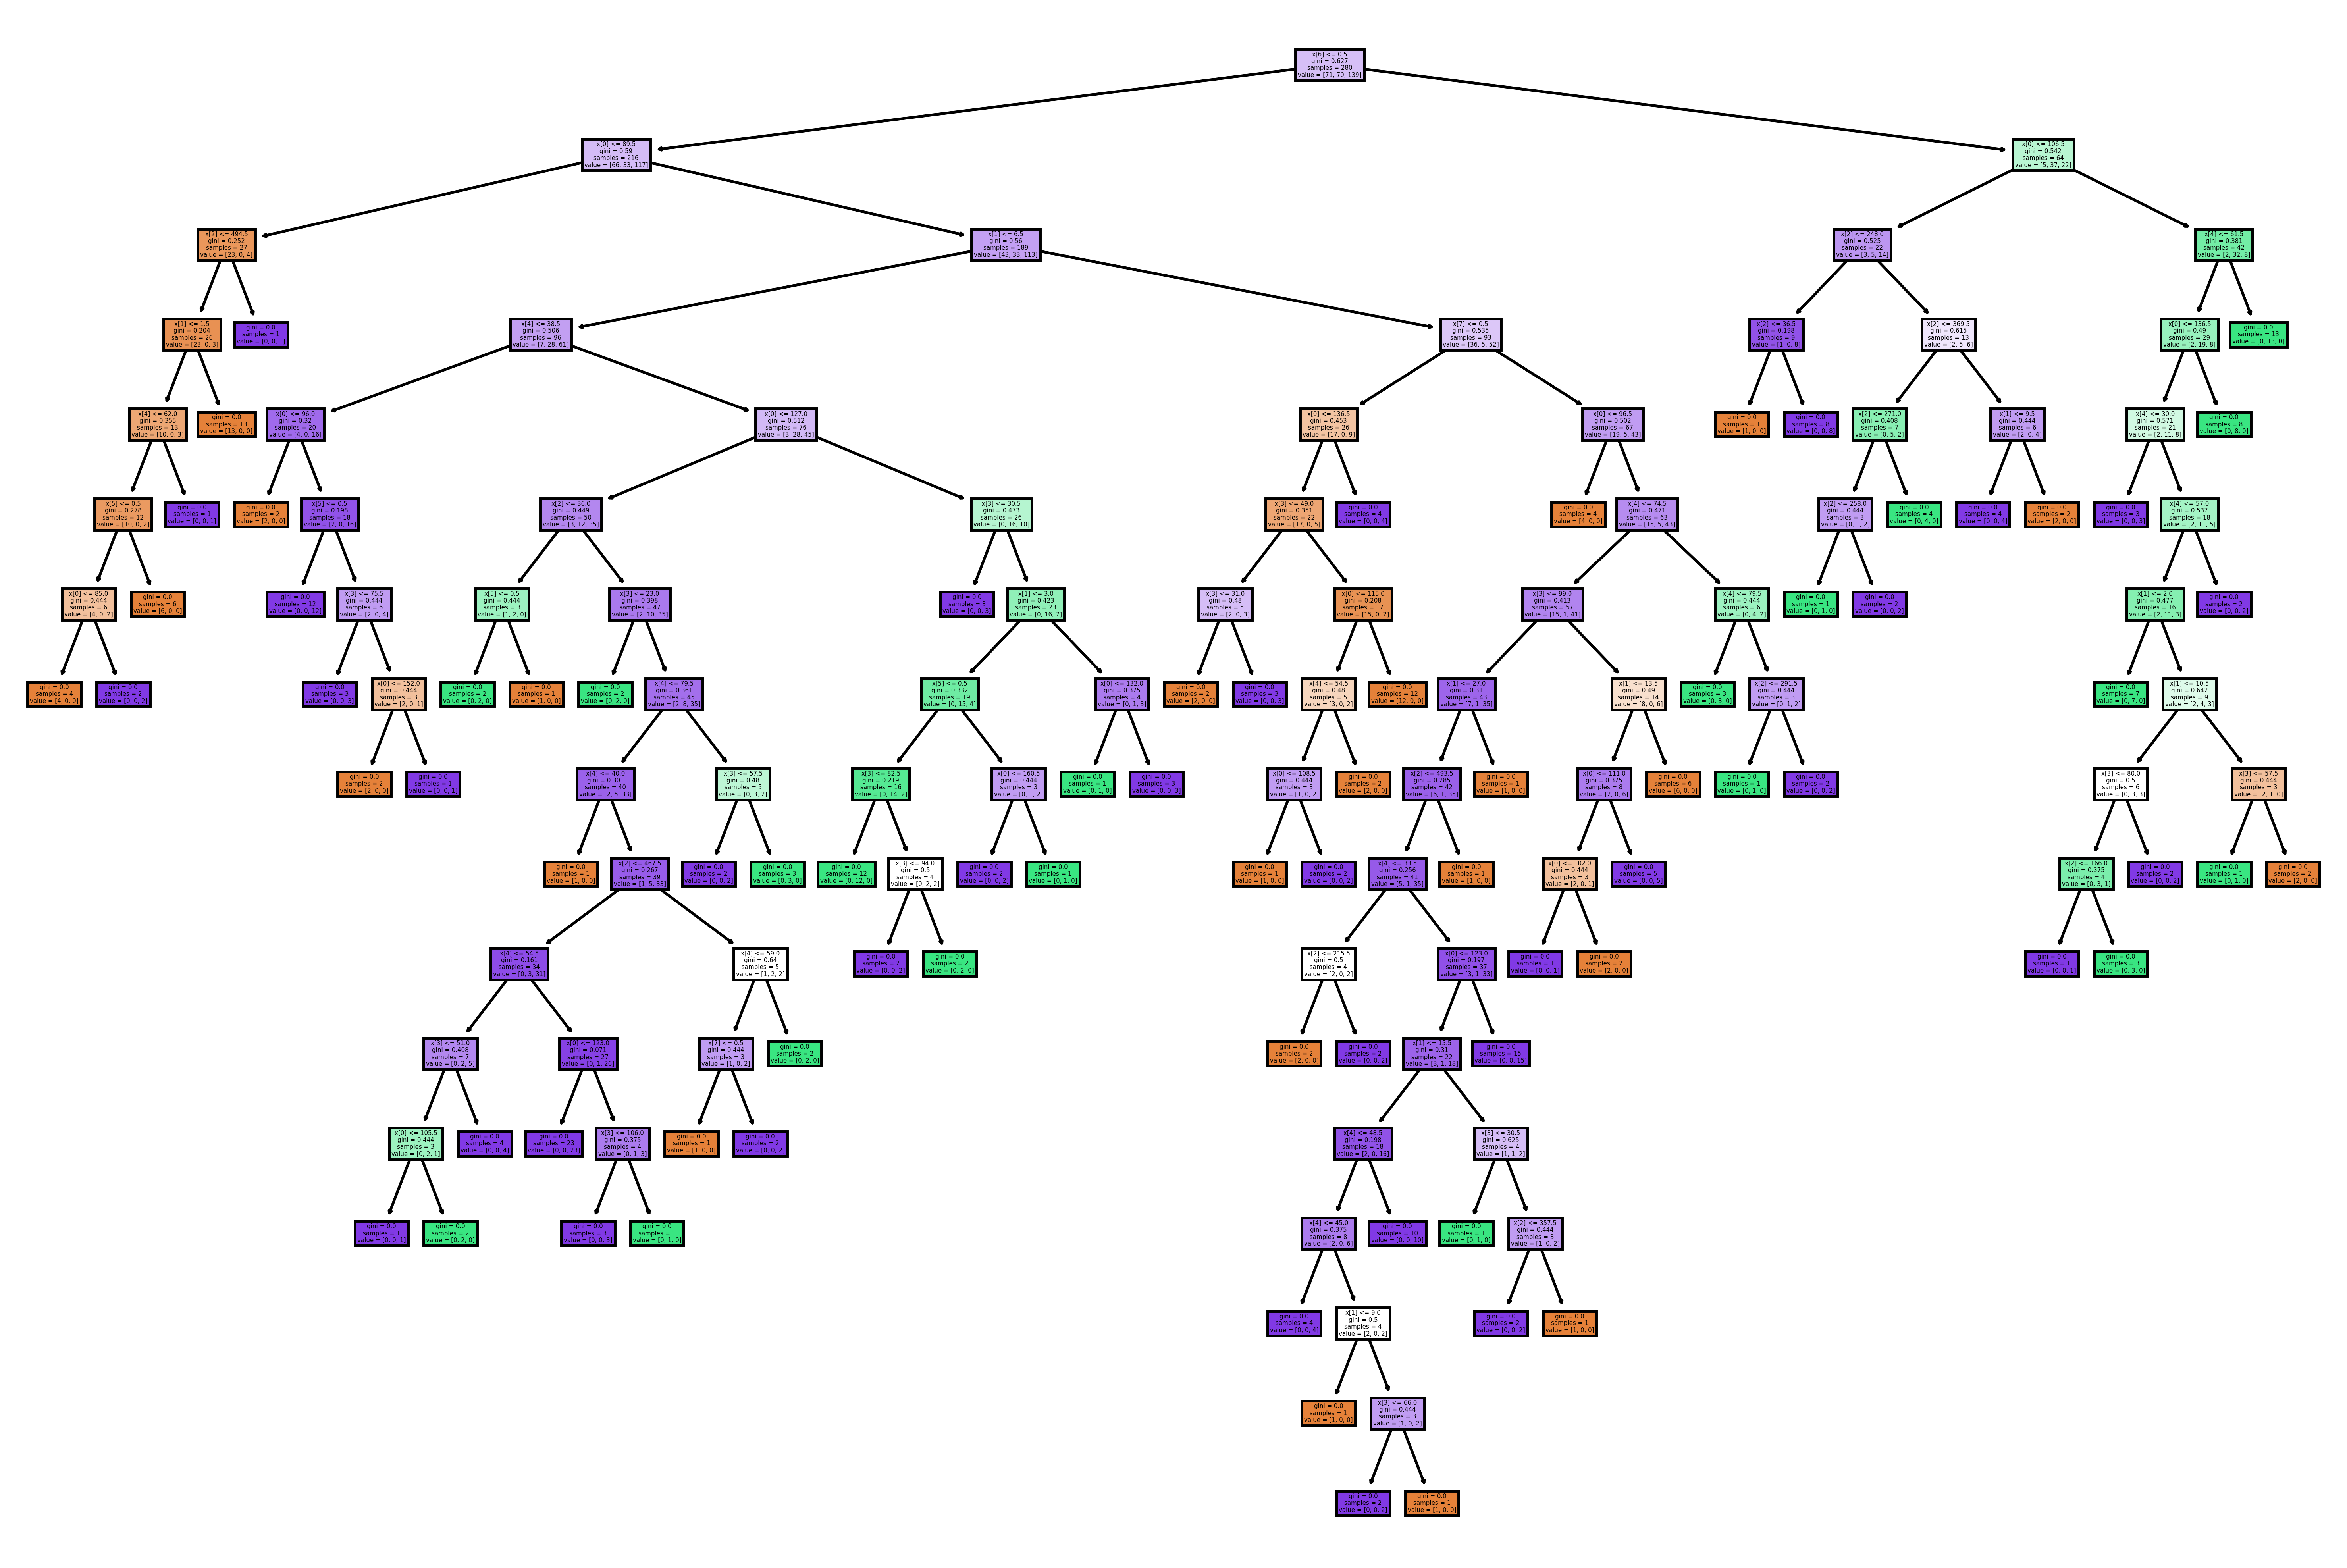

In [96]:
plt.figure(figsize=(15,10), dpi=500)
tree.plot_tree(model_gini, filled=True)
plt.show()

In [97]:
# Predicting on test data
preds = model_gini.predict(x_test)
pd.Series(preds).value_counts()

2    60
1    30
0    30
dtype: int64

In [98]:
pd.crosstab(y_test, preds)

col_0   0   1   2
Sales            
0      19   1  11
1       1  14  15
2      10  15  34

In [101]:
np.mean(preds==y_test)

0.5583333333333333

In [102]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62        31
           1       0.47      0.47      0.47        30
           2       0.57      0.58      0.57        59

    accuracy                           0.56       120
   macro avg       0.56      0.55      0.55       120
weighted avg       0.56      0.56      0.56       120



In [104]:
path = model_gini.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [107]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='gini', random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is : {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is : 1 with ccp_alpha: 0.05022787934618289


For the remainder of this example, we remove the last element in `clfs` and `ccp_alphas`, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

#### 8.2.1 Accuracy vs alpha for training and testing sets<a class="anchor" id="8.2.2"></a>
When `ccp_alpha` is set to zero and keeping the other default parameters of :class:`DecisionTreeClassifier`, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting `ccp_alpha=0.015` maximizes the testing accuracy.

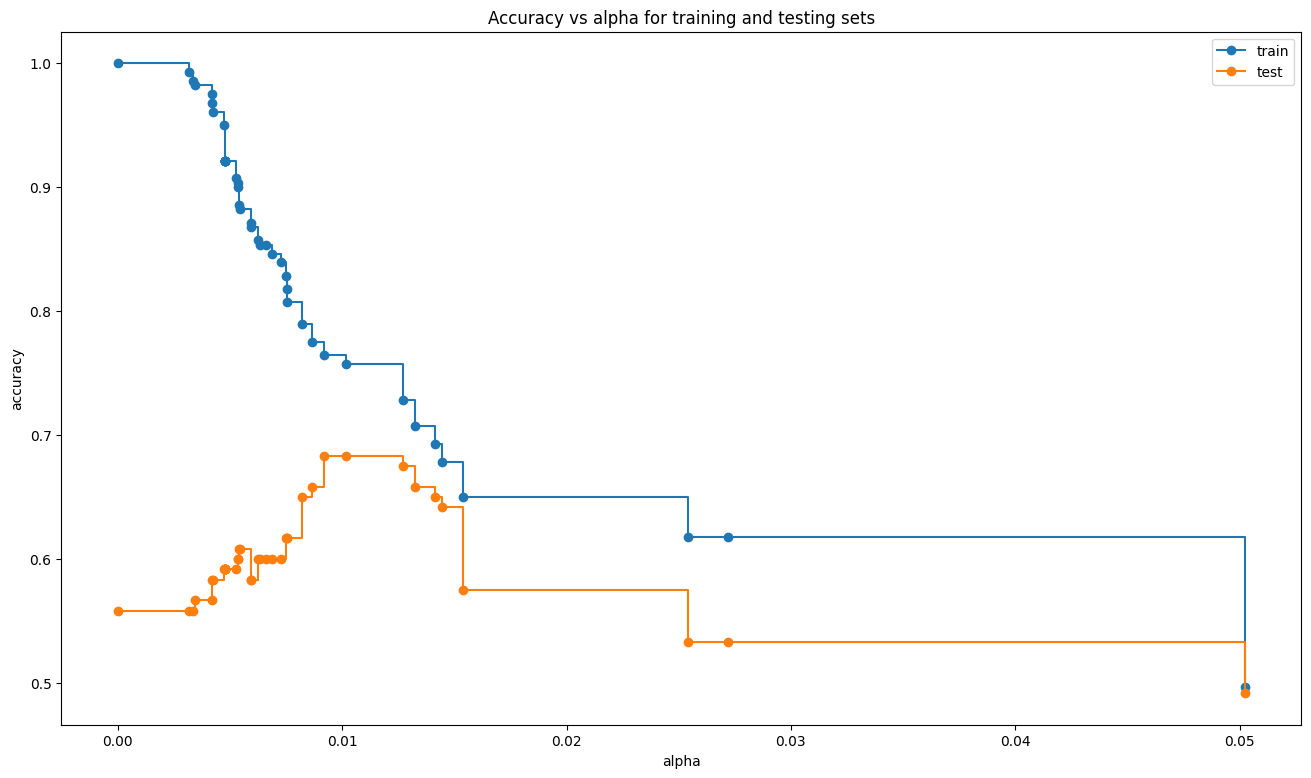

In [108]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [109]:
ccp_alphas

array([0.        , 0.0031746 , 0.00334084, 0.00343915, 0.00420168,
       0.00421984, 0.0042328 , 0.00473901, 0.0047619 , 0.0047619 ,
       0.0047619 , 0.0047619 , 0.0047619 , 0.0047619 , 0.0047619 ,
       0.00529101, 0.00535714, 0.00538258, 0.00540316, 0.00544218,
       0.0059315 , 0.00595238, 0.00624533, 0.00634921, 0.00659722,
       0.00686907, 0.00729167, 0.00749618, 0.00752976, 0.00753968,
       0.00822683, 0.00864286, 0.00917344, 0.01015873, 0.01269885,
       0.01324073, 0.01414018, 0.01443556, 0.01539074, 0.0253957 ,
       0.02718303, 0.05022788])

#### Choosing the best value of **`ccp_alpha`** where the testing and training accuracy are almost same or near or closer to each other

In [111]:
clf = DecisionTreeClassifier(criterion='gini', random_state=0, ccp_alpha = 0.02518644)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.02518644, random_state=0)

In [114]:
pred_test = clf.predict(x_test)
pred_train = clf.predict(x_train)
from sklearn.metrics import accuracy_score
print("Training Accuracy", accuracy_score(y_train, pred_train) , '\n'
'Testing Accuracy', accuracy_score(y_test, pred_test))

Training Accuracy 0.65 
Testing Accuracy 0.575


              precision    recall  f1-score   support

           0       0.88      0.23      0.36        31
           1       0.61      0.37      0.46        30
           2       0.54      0.86      0.67        59

    accuracy                           0.57       120
   macro avg       0.68      0.49      0.49       120
weighted avg       0.65      0.57      0.54       120



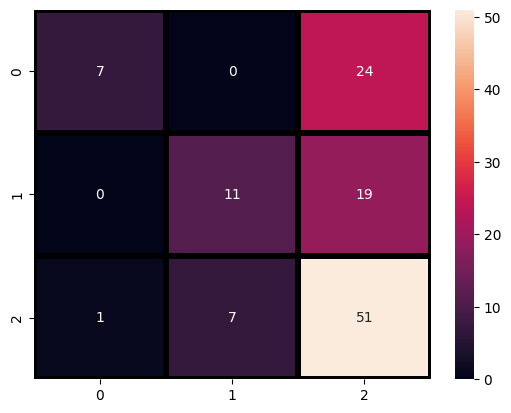

In [116]:
sns.heatmap(confusion_matrix(y_test, pred_test), annot=True, fmt='d', linecolor='k', linewidths=3)
print(classification_report(y_test, pred_test))

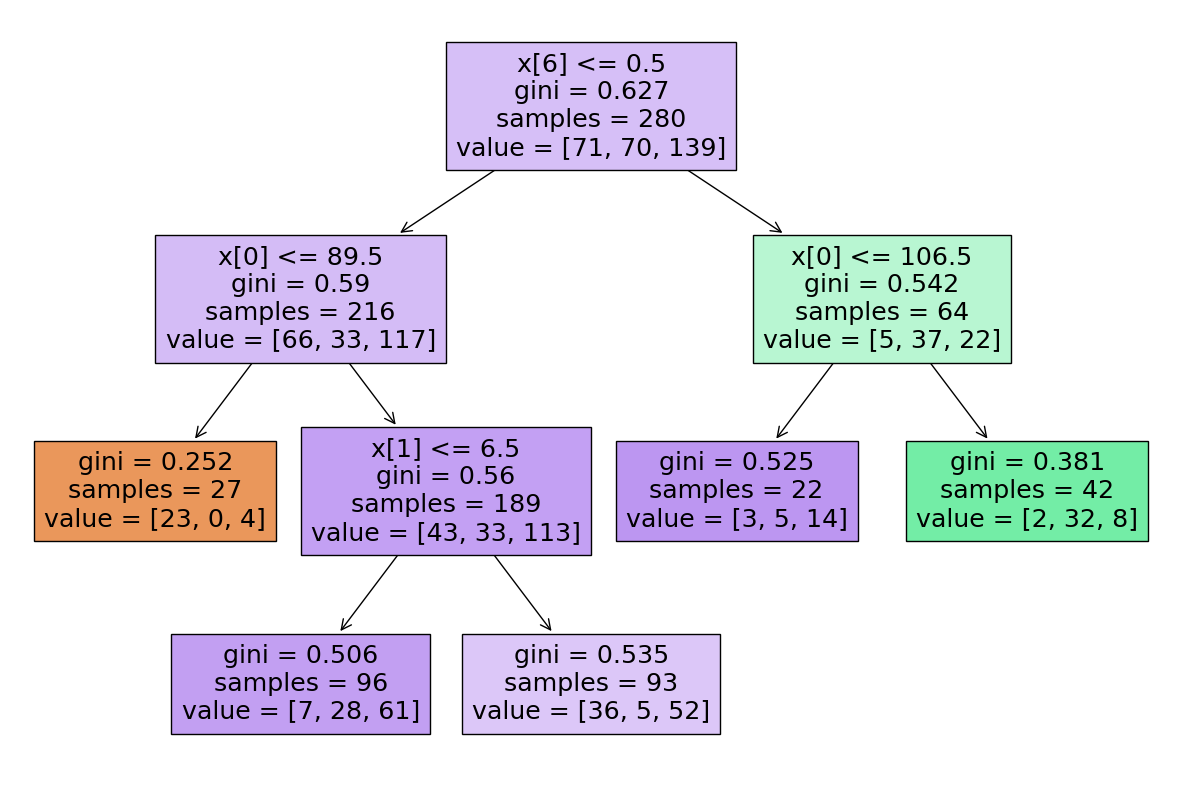

In [117]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True)
plt.show()

## Advantages of CART<a class="anchor" id="9"></a>
+ ### Simple to understand, interpret, visualize.
+ ### Decision trees implicitly perform variable screening or feature selection.
+ ### Can handle both numerical and categorical data. Can also handle multi-output problems.
+ ### Decision trees require relatively little effort from users for data preparation.
+ ### Nonlinear relationships between parameters do not affect tree performance
+ ### It is simple to understand as it follows the same process which a human follow while making any decision in real-life.
+ ### It can be very useful for solving decision-related problems.
+ ### It helps to think about all the possible outcomes for a problem.

##  Disadvantages of CART<a class="anchor" id="10"></a>
+ ### Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting.
+ ### Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This is called variance, which needs to be lowered by methods like bagging and boosting.
+ ### Greedy algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees, where the features and samples are randomly sampled with replacement.
+ ### Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the data set prior to fitting with the decision tree.
+ ### It may have an overfitting issue, which can be resolved using the Random Forest algorithm.
+ ### For more class labels, the computational complexity of the decision tree may increase.